<a href="https://colab.research.google.com/github/osirisberbesia/Laboratoria-Proyecto2-Hipotesis/blob/main/Laboratoria2_Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hipótesis
## Hito 2


In [74]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import IPython

# Autenticar en Google Colab
auth.authenticate_user()

# Crear un cliente de BigQuery
client = bigquery.Client(project="laboratoria2")

# Consulta a BigQuery
query = f"""
SELECT * FROM `{"laboratoria2"}.{"datos_hipotesis"}.{"view_unificado"}`
"""

# Obtener todos los registros de la consulta y convertirlos en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Eliminar columnas que contienen 100% de valores NaN
df_cleaned = df.dropna(axis=1, how='all')

# Eliminar filas que contienen 100% de valores NaN
df_cleaned = df_cleaned.dropna(axis=0, how='all')

# Limpiar la salida de la ejecución anterior
IPython.display.clear_output()

# Mostrar el mensaje con la cantidad de datos y columnas
print(f"{len(df_cleaned)} datos traídos, con {df_cleaned.shape[1]} columnas")

# Mostrar todo el DataFrame de forma bonita y compacta
IPython.display.display(df_cleaned)

# Mostrar los encabezados del DataFrame
print("Encabezados del DataFrame:")
print(", ".join(df_cleaned.columns))



948 datos traídos, con 36 columnas


,track_id,track_name,artist_s_name,artist_count,categoria_artista,genero_artista,modo_cancion,released_date,in_spotify_playlists,in_spotify_charts,...,acousticness_%,cuartiles_acousticness,instrumentalness_%,cuartiles_instrumental,liveness_%,cuartiles_live,speechiness_%,cuartiles_speech,cuartiles_streams,cuartiles_categoria
0,2475712,Agudo Mgi,"Styrx, utku INC, Thezth",3,Estrella,Otros,Feat,1930-01-01,323,0,...,22,Bajo,4,Alto,7,Bajo,5,Bajo,4,Alto
1,6909746,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,Estrella,Otros,Feat,1942-01-01,11940,0,...,91,Alto,0,Bajo,40,Alto,3,Bajo,3,Medio-Alto
2,3087104,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,Estrella,Otros,Solo,1946-11-01,11500,0,...,84,Alto,0,Bajo,11,Bajo,4,Bajo,3,Medio-Alto
3,8753775,Let It Snow Let It Snow Let It Snow,"Frank Sinatra, B Swanson Quartet",2,Estrella,Otros,Feat,1950-01-01,10585,0,...,88,Alto,0,Bajo,34,Alto,6,Bajo,3,Medio-Alto
4,4002890,A Holly Jolly Christmas - Single Version,Burl Ives,1,Estrella,Otros,Solo,1952-01-01,7930,0,...,64,Alto,0,Bajo,15,Bajo,3,Bajo,3,Medio-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,4214662,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,Estrella,Otros,Feat,2023-07-13,437,31,...,5,Bajo,0,Bajo,6,Bajo,5,Bajo,1,Bajo
944,1404326,What Was I Made For? From The Motion Picture B...,Billie Eilish,1,Superestrella,Pop,Solo,2023-07-13,873,104,...,96,Alto,0,Bajo,10,Bajo,3,Bajo,3,Medio-Alto
945,4487095,Overdrive,Post Malone,1,Superestrella,Hip Hop/Rap,Solo,2023-07-14,410,36,...,0,Bajo,0,Bajo,35,Alto,4,Bajo,1,Bajo
946,4082370,Seven (feat Latto) (Explicit Ver),"Latto, Jung Kook",2,Estrella,Otros,Feat,2023-07-14,553,147,...,31,Bajo,0,Bajo,8,Bajo,4,Bajo,1,Bajo


Encabezados del DataFrame:
track_id, track_name, artist_s_name, artist_count, categoria_artista, genero_artista, modo_cancion, released_date, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, participacion_total, streams, bpm, key, mode, danceability_%, cuartiles_dance, valence_%, cuartiles_valence, energy_%, cuartiles_energy, acousticness_%, cuartiles_acousticness, instrumentalness_%, cuartiles_instrumental, liveness_%, cuartiles_live, speechiness_%, cuartiles_speech, cuartiles_streams, cuartiles_categoria


In [132]:
from scipy.stats import shapiro, ttest_ind, wilcoxon
import pandas as pd

# Definir las características y la columna de categorización
caracteristicas = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                   'instrumentalness_%', 'liveness_%', 'speechiness_%']
grupo_categoria = 'cuartiles_categoria'  # Ajustar según la columna que define los grupos

# Filtrar solo las columnas relevantes y eliminar filas con NaN en 'streams'
df_filtered = df_cleaned[['streams'] + caracteristicas + [grupo_categoria]].dropna(subset=['streams'])

# Función para realizar la prueba de Shapiro-Wilk
def test_shapiro(df, grupo, caracteristica):
    grupo_alto = df[df[grupo] == 'Alto'][caracteristica]
    grupo_bajo = df[df[grupo] == 'Bajo'][caracteristica]
    grupo_medio_alto = df[df[grupo] == 'Medio-Alto'][caracteristica]
    grupo_medio_bajo = df[df[grupo] == 'Medio-Bajo'][caracteristica]
    p_alto = shapiro(grupo_alto)[1]
    p_bajo = shapiro(grupo_bajo)[1]
    p_medio_alto = shapiro(grupo_medio_alto)[1]
    p_medio_bajo = shapiro(grupo_medio_bajo)[1]
    return p_alto, p_bajo, p_medio_alto, p_medio_bajo

# Función para realizar el test t de Welch
def test_t(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df[grupo_categoria] == grupo1][caracteristica]
    grupo2_data = df[df[grupo_categoria] == grupo2][caracteristica]
    stat, p = ttest_ind(grupo1_data, grupo2_data, equal_var=False)
    return p

# Función para realizar el test de Wilcoxon
def test_wilcoxon(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df[grupo_categoria] == grupo1][caracteristica]
    grupo2_data = df[df[grupo_categoria] == grupo2][caracteristica]
    stat, p = wilcoxon(grupo1_data, grupo2_data)
    return p

# Calcular promedios de características y streams por grupo
promedios = df_filtered.groupby(grupo_categoria).agg({
    caracteristicas[0]: 'mean',
    caracteristicas[1]: 'mean',
    caracteristicas[2]: 'mean',
    caracteristicas[3]: 'mean',
    caracteristicas[4]: 'mean',
    caracteristicas[5]: 'mean',
    caracteristicas[6]: 'mean',
    'streams': 'mean'
}).rename(columns={
    caracteristicas[0]: 'promedio_danceability',
    caracteristicas[1]: 'promedio_valence',
    caracteristicas[2]: 'promedio_energy',
    caracteristicas[3]: 'promedio_acousticness',
    caracteristicas[4]: 'promedio_instrumentalness',
    caracteristicas[5]: 'promedio_liveness',
    caracteristicas[6]: 'promedio_speechiness',
    'streams': 'promedio_streams'
})

# Realizar pruebas estadísticas para cada característica
resultados = {}
for caracteristica in caracteristicas:
    # Prueba Shapiro-Wilk
    p_alto, p_bajo, p_medio_alto, p_medio_bajo = test_shapiro(df_filtered, grupo_categoria, caracteristica)

    # Determinar qué prueba utilizar en función de la normalidad (p > 0.05)
    if p_alto > 0.05 and p_bajo > 0.05:
        p_value_alto_bajo = test_t(df_filtered, 'Alto', 'Bajo', caracteristica)  # Test t si normal
    else:
        p_value_alto_bajo = test_wilcoxon(df_filtered, 'Alto', 'Bajo', caracteristica)  # Test de Wilcoxon si no normal

    if p_alto > 0.05 and p_medio_alto > 0.05:
        p_value_alto_medio_alto = test_t(df_filtered, 'Alto', 'Medio-Alto', caracteristica)
    else:
        p_value_alto_medio_alto = test_wilcoxon(df_filtered, 'Alto', 'Medio-Alto', caracteristica)

    if p_alto > 0.05 and p_medio_bajo > 0.05:
        p_value_alto_medio_bajo = test_t(df_filtered, 'Alto', 'Medio-Bajo', caracteristica)
    else:
        p_value_alto_medio_bajo = test_wilcoxon(df_filtered, 'Alto', 'Medio-Bajo', caracteristica)

    resultados[caracteristica] = {
        'Shapiro-Wilk (Alto)': p_alto,
        'Shapiro-Wilk (Bajo)': p_bajo,
        'Shapiro-Wilk (Medio-Alto)': p_medio_alto,
        'Shapiro-Wilk (Medio-Bajo)': p_medio_bajo,
        'Test T (Alto vs Bajo)': p_value_alto_bajo,
        'Test T (Alto vs Medio-Alto)': p_value_alto_medio_alto,
        'Test T (Alto vs Medio-Bajo)': p_value_alto_medio_bajo,
        'Test Wilcoxon (Alto vs Bajo)': test_wilcoxon(df_filtered, 'Alto', 'Bajo', caracteristica),
        'Test Wilcoxon (Alto vs Medio-Alto)': test_wilcoxon(df_filtered, 'Alto', 'Medio-Alto', caracteristica),
        'Test Wilcoxon (Alto vs Medio-Bajo)': test_wilcoxon(df_filtered, 'Alto', 'Medio-Bajo', caracteristica)
    }

# Mostrar resultados
for caracteristica, resultado in resultados.items():
    print(f"Característica: {caracteristica}")
    print(f"Shapiro-Wilk (Alto): {resultado['Shapiro-Wilk (Alto)']:.4f}")
    print(f"Shapiro-Wilk (Bajo): {resultado['Shapiro-Wilk (Bajo)']:.4f}")
    print(f"Shapiro-Wilk (Medio-Alto): {resultado['Shapiro-Wilk (Medio-Alto)']:.4f}")
    print(f"Shapiro-Wilk (Medio-Bajo): {resultado['Shapiro-Wilk (Medio-Bajo)']:.4f}")
    print(f"Test T (Alto vs Bajo): {resultado['Test T (Alto vs Bajo)']:.4f}")
    print(f"Test T (Alto vs Medio-Alto): {resultado['Test T (Alto vs Medio-Alto)']:.4f}")
    print(f"Test T (Alto vs Medio-Bajo): {resultado['Test T (Alto vs Medio-Bajo)']:.4f}")
    print(f"Test Wilcoxon (Alto vs Bajo): {resultado['Test Wilcoxon (Alto vs Bajo)']:.4f}")
    print(f"Test Wilcoxon (Alto vs Medio-Alto): {resultado['Test Wilcoxon (Alto vs Medio-Alto)']:.4f}")
    print(f"Test Wilcoxon (Alto vs Medio-Bajo): {resultado['Test Wilcoxon (Alto vs Medio-Bajo)']:.4f}")
    print()


Característica: danceability_%
Shapiro-Wilk (Alto): 0.0000
Shapiro-Wilk (Bajo): 0.0025
Shapiro-Wilk (Medio-Alto): 0.0008
Shapiro-Wilk (Medio-Bajo): 0.0032
Test T (Alto vs Bajo): 0.3248
Test T (Alto vs Medio-Alto): 0.4413
Test T (Alto vs Medio-Bajo): 0.7481
Test Wilcoxon (Alto vs Bajo): 0.3248
Test Wilcoxon (Alto vs Medio-Alto): 0.4413
Test Wilcoxon (Alto vs Medio-Bajo): 0.7481

Característica: valence_%
Shapiro-Wilk (Alto): 0.0004
Shapiro-Wilk (Bajo): 0.0001
Shapiro-Wilk (Medio-Alto): 0.0011
Shapiro-Wilk (Medio-Bajo): 0.0004
Test T (Alto vs Bajo): 0.2154
Test T (Alto vs Medio-Alto): 0.4086
Test T (Alto vs Medio-Bajo): 0.2594
Test Wilcoxon (Alto vs Bajo): 0.2154
Test Wilcoxon (Alto vs Medio-Alto): 0.4086
Test Wilcoxon (Alto vs Medio-Bajo): 0.2594

Característica: energy_%
Shapiro-Wilk (Alto): 0.0008
Shapiro-Wilk (Bajo): 0.0003
Shapiro-Wilk (Medio-Alto): 0.0029
Shapiro-Wilk (Medio-Bajo): 0.0024
Test T (Alto vs Bajo): 0.9597
Test T (Alto vs Medio-Alto): 0.1603
Test T (Alto vs Medio-Bajo):

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables a calcular las métricas
variables = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
             'participacion_total']

# Calcular métricas estadísticas para cada variable
summary_table = df_cleaned[variables].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])

# Mostrar la tabla resumen en formato de tabla de Pandas
summary_table.style.format("{:,.2f}").set_caption("Métricas estadísticas para las variables")

# Mostrar la tabla en el notebook
summary_table


,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,participacion_total
mean,"514,202,920.22",122.50,66.97,51.33,64.21,27.14,1.59,18.16,10.15,"5,666.11"
median,"289,165,138.50",121.00,69.00,51.00,66.00,18.00,0.00,12.00,6.00,"2,306.00"
std,"567,831,924.10",28.06,14.64,23.49,16.55,26.04,8.43,13.71,9.93,"8,933.29"
var,"322,433,094,024,262,400.00",787.52,214.21,551.64,274.06,677.94,71.08,188.09,98.68,"79,803,732.68"
min,"2,762.00",65.00,23.00,4.00,9.00,0.00,0.00,3.00,2.00,34.00
max,"3,703,895,074.00",206.00,96.00,97.00,97.00,97.00,91.00,97.00,64.00,"62,623.00"
count,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00,948.00


,Promedio,Mediana,Desviación Estándar,Varianza,Mínimo,Máximo,Número de Elementos
danceability_%,66.966245,69.0,14.635917,214.210053,23.0,96.0,948.0
valence_%,51.328059,51.0,23.487015,551.639888,4.0,97.0,948.0
energy_%,64.209916,66.0,16.554771,274.060430,9.0,97.0,948.0
acousticness_%,27.142405,18.0,26.037252,677.938517,0.0,97.0,948.0
instrumentalness_%,1.589662,0.0,8.431185,71.084877,0.0,91.0,948.0
liveness_%,18.160338,12.0,13.714452,188.086197,3.0,97.0,948.0
speechiness_%,10.151899,6.0,9.933790,98.680176,2.0,64.0,948.0


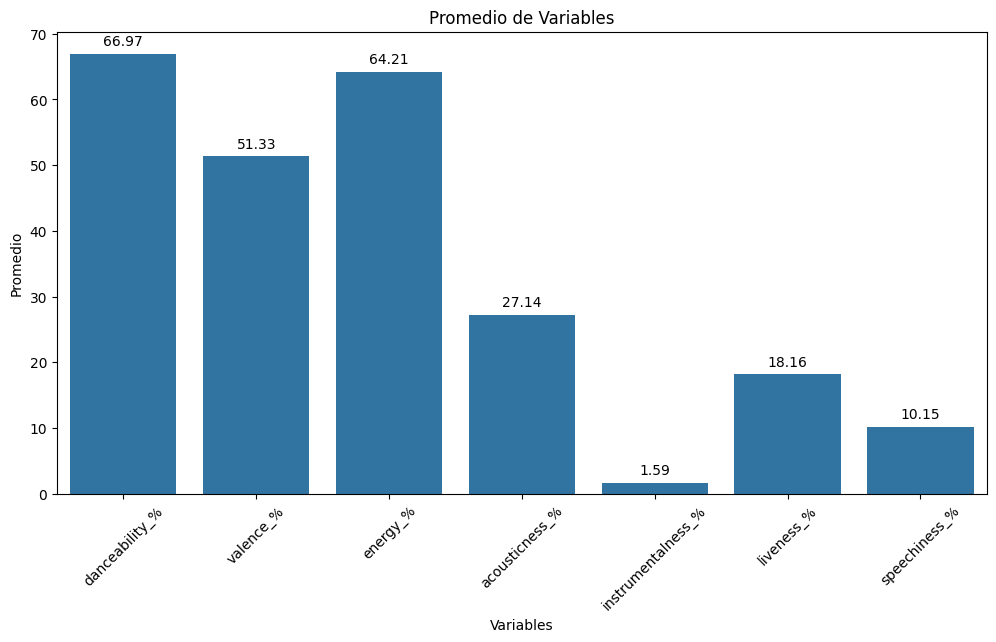

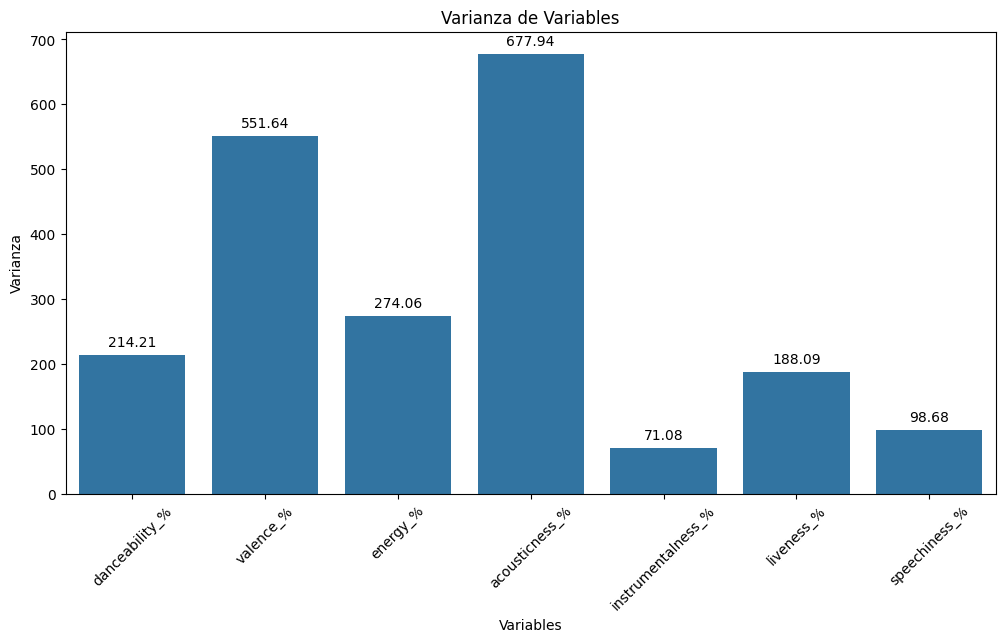

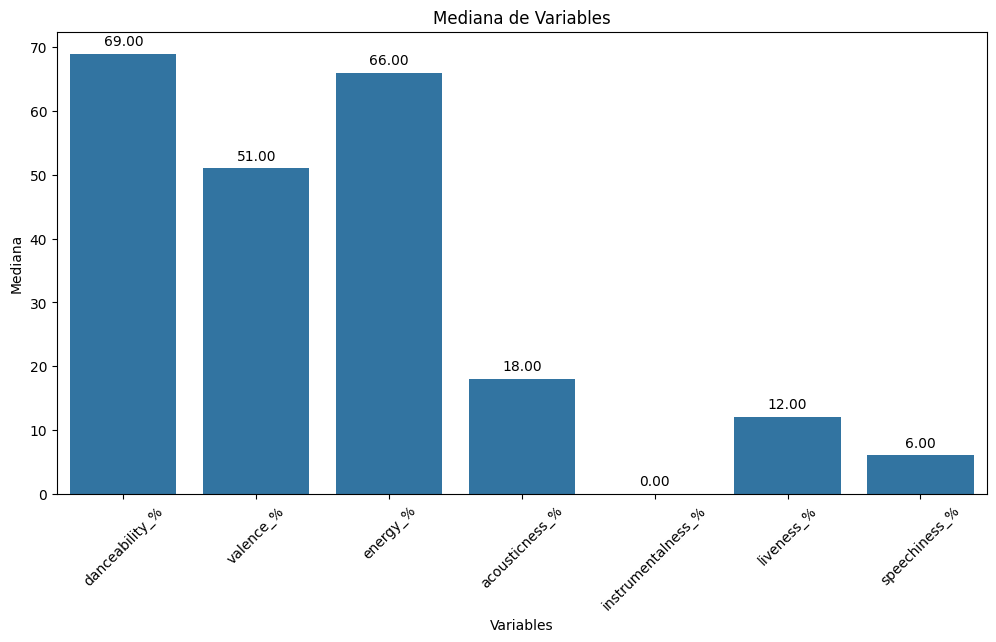

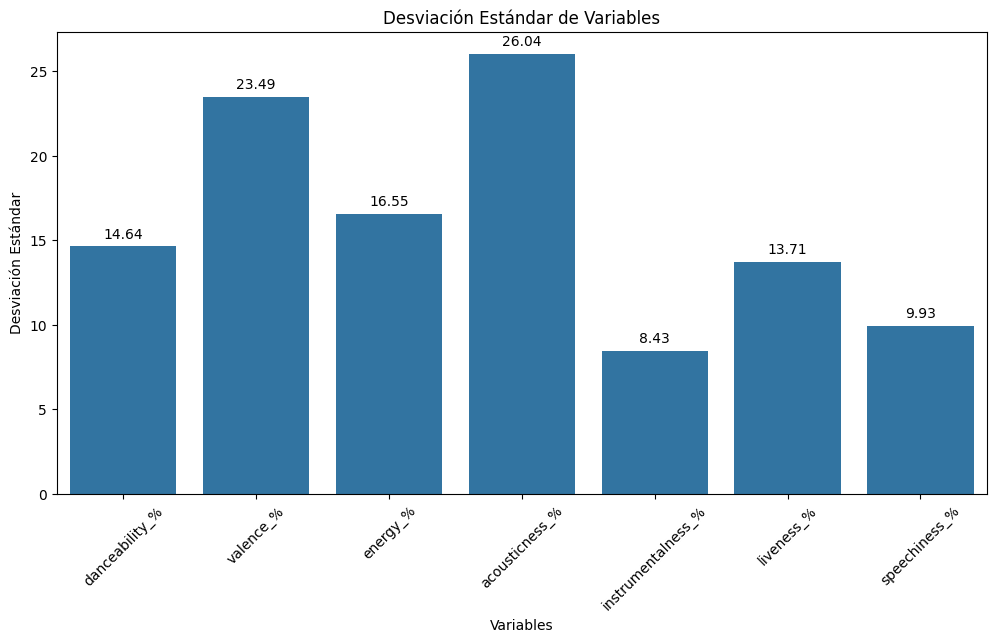

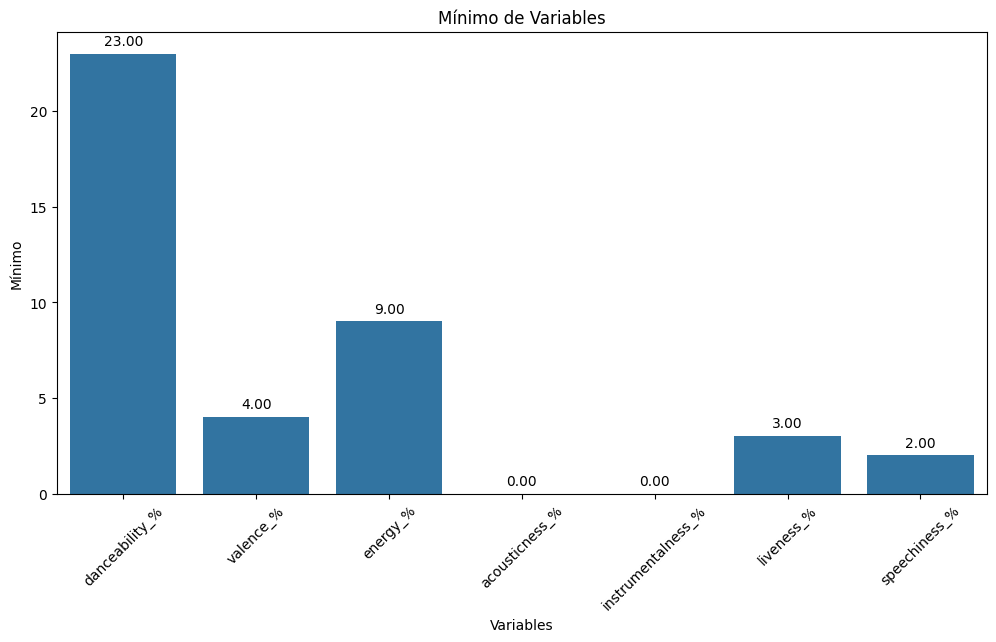

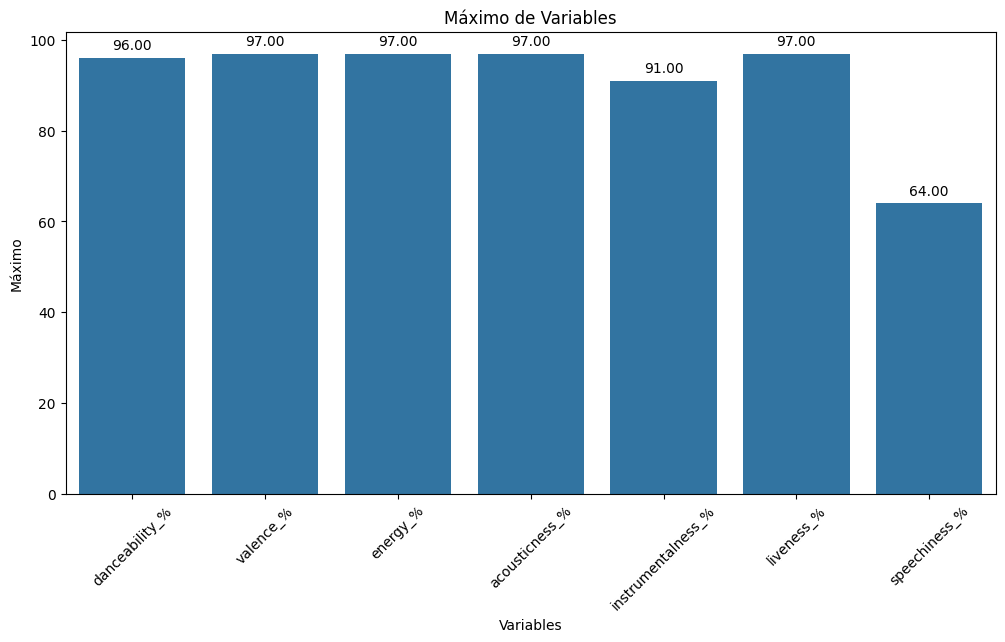

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables a calcular las métricas (excluyendo 'streams', 'bpm' y 'participacion_total')
variables = ['danceability_%', 'valence_%', 'energy_%',
             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Calcular métricas estadísticas para cada variable
summary_table = df_cleaned[variables].agg(['mean', 'median', 'std', 'var', 'min', 'max', 'count'])

# Transponer la tabla para una mejor visualización
summary_table = summary_table.T

# Renombrar columnas para mayor claridad
summary_table.columns = ['Promedio', 'Mediana', 'Desviación Estándar', 'Varianza', 'Mínimo', 'Máximo', 'Número de Elementos']

# Mostrar la tabla en un Jupyter Notebook
display(summary_table)

# Guardar la tabla en un archivo Excel
summary_table.to_excel("summary_statistics.xlsx", index=True)

# Crear gráficos de barras para cada métrica
metrics = ['Promedio', 'Varianza', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=summary_table.index, y=summary_table[metric])
    plt.title(f'{metric} de Variables')
    plt.xlabel('Variables')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

    # Añadir etiquetas de datos
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()


## Hito 3

En este hito aplicarás la regresión linear para las mismas hipótesis analizadas en el hito 1.

- [x]  Las canciones con un mayor BPM (Beats Por Minuto) tienen más éxito en términos de streams en Spotify
- [x]  Las canciones más populares en el ranking de Spotify también tienen un comportamiento similar en otras plataformas como Deezer
- [x]  La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams
- [x]  Los artistas con un mayor número de canciones en Spotify tienen más streams
- [x]  Las características de la canción influyen en el éxito en términos de streams en Spotify

---

Meta

🔴 Regresión lineal	Entendimiento más profundizado de la relación lineal entre dos variables continuas

Cada una debe hacer al menos una vez este análisis, por ejemplo una hace para streams por bpm y la otra streams por total_playlists.

Lo importante también es discutir los resultados y explorar las otras variables.

⚠️ Para empezar, abstrae la idea de dividir la data en “entrenamiento” y “test”. Este concepto será abordado con más profundidad en los próximos proyectos.

🎥 Guia práctico de los pasos para ejecutar una regresión lineal simple en Python con el paquete sklearn..

📄 Tutorial práctico de los pasos para ejecutar (e interpretar) una regresión lineal simple en Python.

🧑‍💻Pide ayuda a Chat GPT para interpretar los resultados.

---

🟠representar datos a través de gráficos o visuales avanzados	Crear un gráfico de dispersión (scatter plot) con la reta obtenida de la regresión linear simple.

Cada una debe hacer al menos una vez este gráfico, por ejemplo una hace para streams por bpm y la otra streams por total_playlists.

Lo importante también es discutir los resultados y explorar las otras variables.

🎥 Guia práctico de los pasos para ejecutar una regresión lineal simple en Python con el paquete sklearn.

📄 Tutorial práctico de los pasos para ejecutar (y interpretar) una regresión lineal simple en Python.

📄 Manual del paquete matplotlib./

🧑‍💻 Pide a Chat GPT que te ayude con el código para crear una scatterplot con el paquete matplotlib y agrega a ese gráfico la línea obtenida de la regresión lineal simple.

🧑‍💻 Pide a Chat GPT que te ayude con el código para “customizar” tu gráfica. Cambia colores, nombres de los ejes, etc etc.

---

### Checklist

- [x]  ¿Has aplicado la técnica de regresión lineal simple (y la entendiste/interpretaste), al menos una vez?
- [x]  ¿Has elaborado al menos un gráfico de dispersión (scatter plot) junto con la línea de regresión resultante?
- [x] ¿Has discutido y seleccionado la información relevante para la presentación en conjunto con tu dupla (si es que lo has hecho en dupla)?



Coeficientes del modelo: [-100034.94960625]
Intercepto del modelo: 509771949.2442488
Error cuadrático medio (MSE): 3.78954009523637e+17


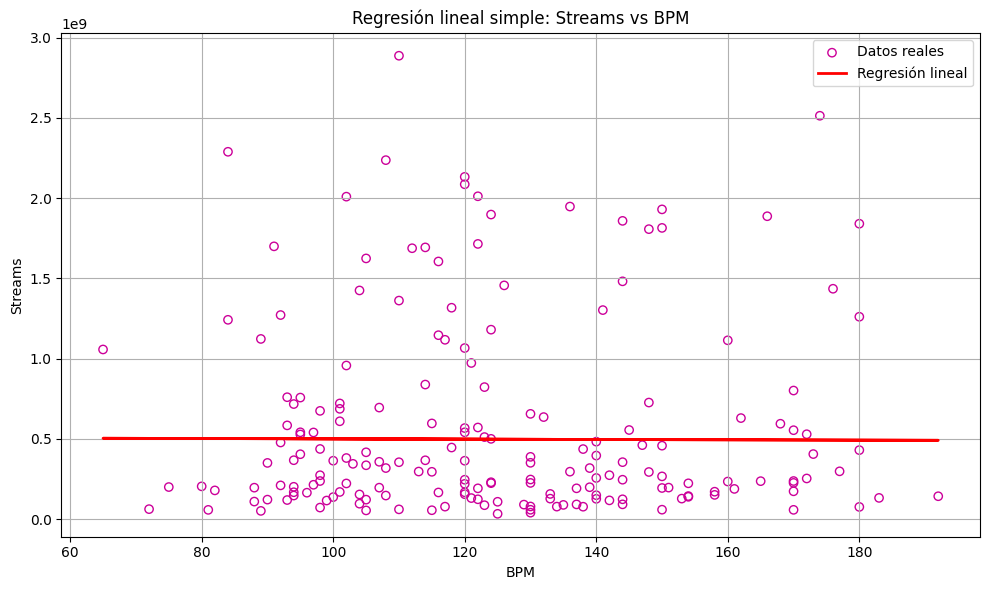

In [ ]:
# Instalar scikit-learn si no está instalado
!pip install scikit-learn

# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir la variable dependiente (target) y la variable independiente (features)
X = df_cleaned[['bpm']]  # Variable independiente (BPM)
y = df_cleaned['streams']  # Variable dependiente (Streams)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)

# Mostrar los coeficientes del modelo y el error cuadrático medio
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)

# Configurar el estilo del gráfico
plt.figure(figsize=(10, 6))

# Graficar el scatter plot con círculos de borde y fondo transparente
plt.scatter(X_test, y_test, edgecolor='#cc0099', facecolor='none', label='Datos reales')

# Graficar la línea de regresión con etiqueta de datos
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')


# Configurar título y etiquetas de ejes
plt.title('Regresión lineal simple: Streams vs BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


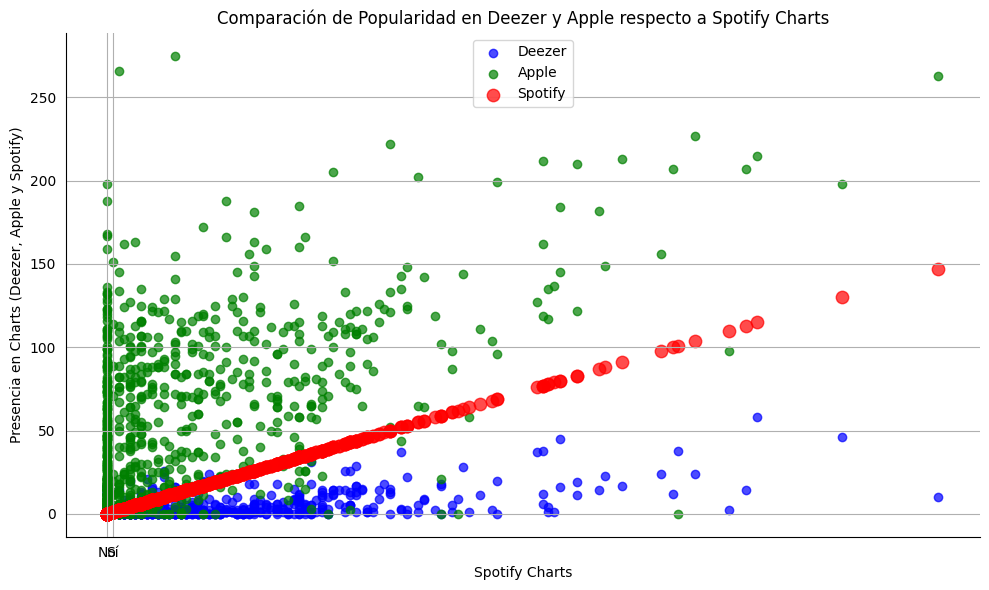

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_charts'].astype(bool),
        df_cleaned['in_deezer_charts'].astype(bool),
        df_cleaned['in_apple_charts'].astype(bool)
    ])
]

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Deezer Charts vs Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_deezer_charts'], color='blue', label='Deezer', alpha=0.7)

# Scatter plot para Apple Charts vs Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_apple_charts'], color='green', label='Apple', alpha=0.7)

# Scatter plot para Spotify Charts
plt.scatter(df_filtered['in_spotify_charts'], df_filtered['in_spotify_charts'], marker='o', s=80, color='red', label='Spotify', alpha=0.7)

# Configurar título y etiquetas de ejes
plt.title('Comparación de Popularidad en Deezer y Apple respecto a Spotify Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Presencia en Charts (Deezer, Apple y Spotify)')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x a 'No' y 'Sí'

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo
plt.show()



Prueba de Shapiro-Wilk para Spotify Charts:
W-statistic: 0.6869614720344543, p-value: 1.6415153248964974e-37

Test t de Student para Deezer vs Spotify Charts:
T-statistic: -14.264810631405497, p-value: 2.486799167406407e-42

Test t de Student para Apple vs Spotify Charts:
T-statistic: 23.435564295372654, p-value: 1.1223952978245818e-99

Test de Wilcoxon-Mann-Whitney para Deezer vs Spotify Charts:
U-statistic: 263284.0, p-value: 4.150186927427789e-36

Test de Wilcoxon-Mann-Whitney para Apple vs Spotify Charts:
U-statistic: 628814.0, p-value: 4.662872441105302e-110


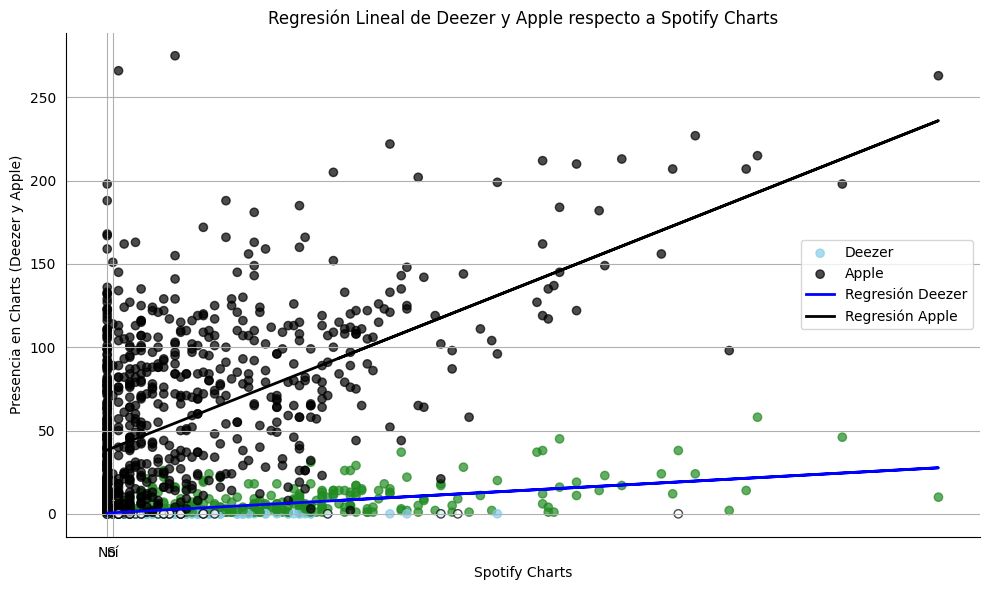


Error Cuadrático Medio (MSE):
Deezer vs Spotify: 24.59
Apple vs Spotify: 1815.13

Explicación del gráfico:
- La línea azul ('Regresión Deezer') representa la tendencia de cómo las canciones populares en Deezer
  se comportan en relación con Spotify Charts. Si la línea sube, indica una correlación positiva.
- La línea negra ('Regresión Apple') muestra la relación entre las canciones populares en Apple Music
  y Spotify Charts. Su inclinación indica la dirección de la relación: hacia arriba significa correlación positiva,
  hacia abajo significa correlación negativa.
- Los círculos verdes oscuros representan las canciones populares en Deezer. Los círculos celestes indican ausencia
  en los charts de Spotify.
- Los círculos blancos con borde negro representan las canciones populares en Apple Music. Los círculos rellenos de negro
  indican ausencia en los charts de Spotify, mientras que los círculos blancos indican presencia.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_charts'].astype(bool),
        df_cleaned['in_deezer_charts'].astype(bool),
        df_cleaned['in_apple_charts'].astype(bool)
    ])
]

# Seleccionar las variables de interés
X = df_filtered['in_spotify_charts'].values.reshape(-1, 1).astype(float)  # Asegurando que X sea de tipo float
y_deezer = df_filtered['in_deezer_charts'].values.astype(float)  # Asegurando que y_deezer sea de tipo float
y_apple = df_filtered['in_apple_charts'].values.astype(float)  # Asegurando que y_apple sea de tipo float

# Crear modelo de regresión lineal para Deezer Charts vs Spotify Charts
model_deezer = LinearRegression()
model_deezer.fit(X, y_deezer)

# Predecir valores de Deezer Charts usando el modelo
y_deezer_pred = model_deezer.predict(X)

# Calcular el Error Cuadrático Medio (MSE) para Deezer Charts
mse_deezer = mean_squared_error(y_deezer, y_deezer_pred)

# Crear modelo de regresión lineal para Apple Charts vs Spotify Charts
model_apple = LinearRegression()
model_apple.fit(X, y_apple)

# Predecir valores de Apple Charts usando el modelo
y_apple_pred = model_apple.predict(X)

# Calcular el Error Cuadrático Medio (MSE) para Apple Charts
mse_apple = mean_squared_error(y_apple, y_apple_pred)

# Realizar pruebas estadísticas

# Prueba de Shapiro-Wilk para Spotify Charts
sw_stat_spotify, sw_pvalue_spotify = stats.shapiro(X.flatten())
print(f"\nPrueba de Shapiro-Wilk para Spotify Charts:")
print(f"W-statistic: {sw_stat_spotify}, p-value: {sw_pvalue_spotify}")

# Test t de Student para Deezer Charts vs Spotify Charts
t_statistic_deezer, p_value_deezer = stats.ttest_ind(y_deezer, X.flatten(), equal_var=False)
print(f"\nTest t de Student para Deezer vs Spotify Charts:")
print(f"T-statistic: {t_statistic_deezer}, p-value: {p_value_deezer}")

# Test t de Student para Apple Charts vs Spotify Charts
t_statistic_apple, p_value_apple = stats.ttest_ind(y_apple, X.flatten(), equal_var=False)
print(f"\nTest t de Student para Apple vs Spotify Charts:")
print(f"T-statistic: {t_statistic_apple}, p-value: {p_value_apple}")

# Test de Wilcoxon-Mann-Whitney para Deezer Charts vs Spotify Charts
w_statistic_deezer, p_value_deezer_w = stats.mannwhitneyu(y_deezer, X.flatten())
print(f"\nTest de Wilcoxon-Mann-Whitney para Deezer vs Spotify Charts:")
print(f"U-statistic: {w_statistic_deezer}, p-value: {p_value_deezer_w}")

# Test de Wilcoxon-Mann-Whitney para Apple Charts vs Spotify Charts
w_statistic_apple, p_value_apple_w = stats.mannwhitneyu(y_apple, X.flatten())
print(f"\nTest de Wilcoxon-Mann-Whitney para Apple vs Spotify Charts:")
print(f"U-statistic: {w_statistic_apple}, p-value: {p_value_apple_w}")

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Deezer Charts vs Spotify Charts
colors_deezer = ['#228B22' if y else '#87CEEB' for y in df_filtered['in_deezer_charts'].astype(bool)]
plt.scatter(X, y_deezer, color=colors_deezer, label='Deezer', alpha=0.7)

# Scatter plot para Apple Charts vs Spotify Charts
colors_apple = ['black' if y else 'white' for y in df_filtered['in_apple_charts'].astype(bool)]
plt.scatter(X, y_apple, color=colors_apple, label='Apple', alpha=0.7, edgecolors='black')

# Regresión lineal para Deezer Charts vs Spotify Charts
plt.plot(X, model_deezer.predict(X), color='blue', linewidth=2, label='Regresión Deezer')

# Regresión lineal para Apple Charts vs Spotify Charts
plt.plot(X, model_apple.predict(X), color='black', linewidth=2, label='Regresión Apple')

# Configurar título y etiquetas de ejes
plt.title('Regresión Lineal de Deezer y Apple respecto a Spotify Charts')
plt.xlabel('Spotify Charts')
plt.ylabel('Presencia en Charts (Deezer y Apple)')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambiar etiquetas del eje x a 'No' y 'Sí'

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo con regresión lineal
plt.show()

# Mostrar el MSE para Deezer y Apple
print("\nError Cuadrático Medio (MSE):")
print(f"Deezer vs Spotify: {mse_deezer:.2f}")
print(f"Apple vs Spotify: {mse_apple:.2f}")

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea azul ('Regresión Deezer') representa la tendencia de cómo las canciones populares en Deezer")
print("  se comportan en relación con Spotify Charts. Si la línea sube, indica una correlación positiva.")
print("- La línea negra ('Regresión Apple') muestra la relación entre las canciones populares en Apple Music")
print("  y Spotify Charts. Su inclinación indica la dirección de la relación: hacia arriba significa correlación positiva,")
print("  hacia abajo significa correlación negativa.")
print("- Los círculos verdes oscuros representan las canciones populares en Deezer. Los círculos celestes indican ausencia")
print("  en los charts de Spotify.")
print("- Los círculos blancos con borde negro representan las canciones populares en Apple Music. Los círculos rellenos de negro")
print("  indican ausencia en los charts de Spotify, mientras que los círculos blancos indican presencia.")


### Deezer
los circulos, verdes pastel para si

celeste para no.

con la linea de regresion azul fuerte

### Apple
Si - circulito blanco de borde negro

No - sea el relleno negro

con la linea de regresion negra.

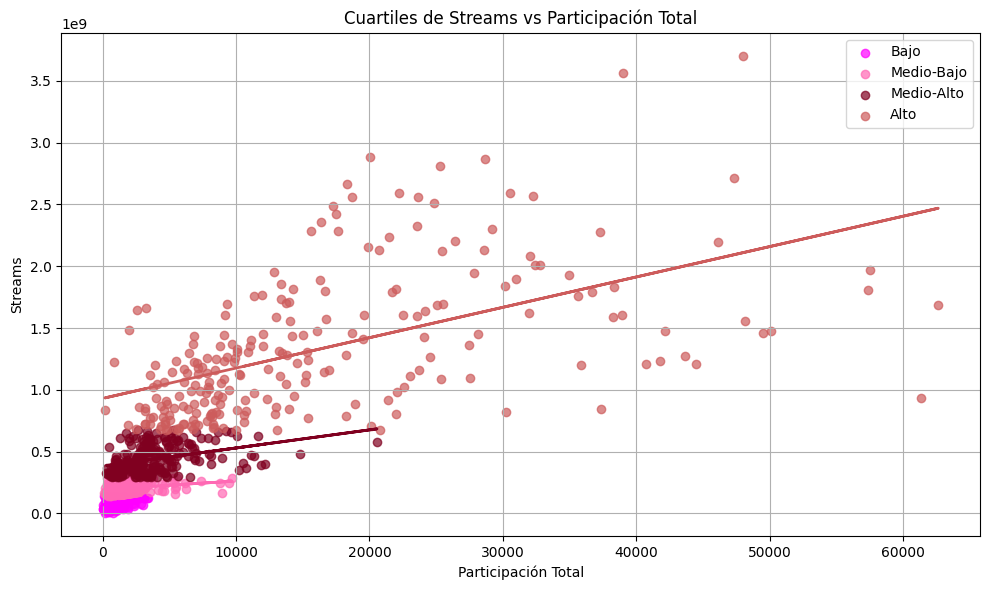

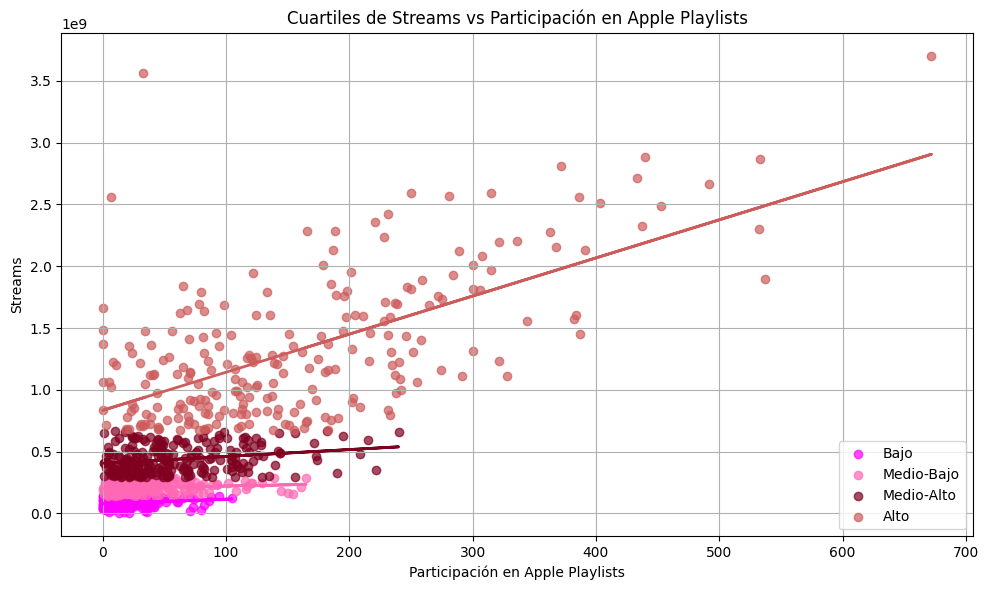

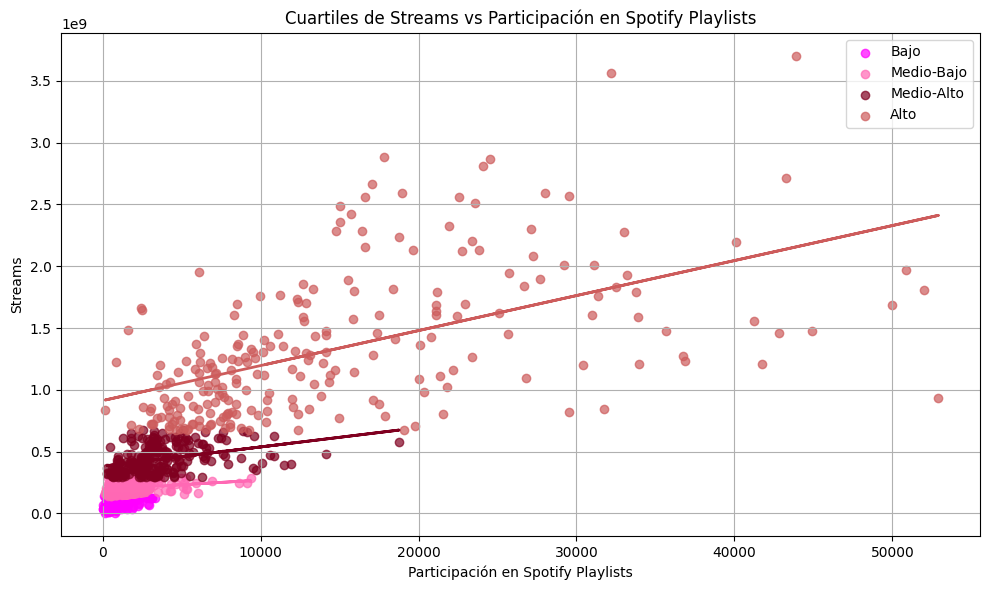

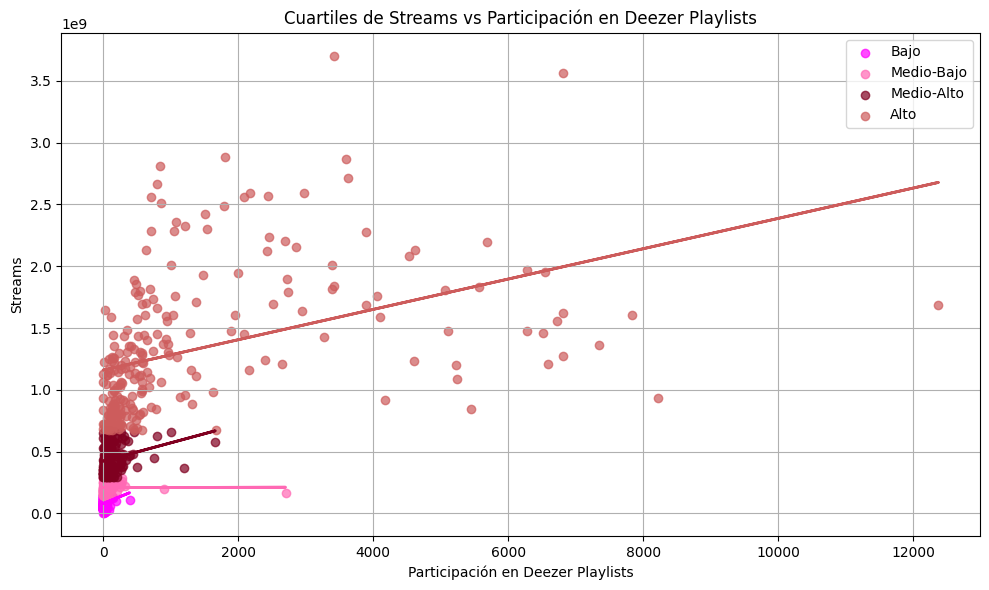


Prueba de Shapiro-Wilk para participacion_total:
W-statistic: 0.604838490486145, p-value: 6.31565217871195e-42

Test t de Student para participacion_total vs streams:
T-statistic: -27.881713972523993, p-value: 2.1923200493039067e-125
Error en la prueba de Wilcoxon-Mann-Whitney para participacion_total vs streams: `x` and `y` must be of nonzero size.

Prueba de Shapiro-Wilk para in_apple_playlists:
W-statistic: 0.7207379341125488, p-value: 5.0567045628336314e-37

Test t de Student para in_apple_playlists vs streams:
T-statistic: -27.8816772657557, p-value: 2.1935541822706083e-125

Test de Wilcoxon-Mann-Whitney para in_apple_playlists vs streams:
U-statistic: 145.0, p-value: 0.3671889398783247

Prueba de Shapiro-Wilk para in_deezer_playlists:
W-statistic: 0.3625755310058594, p-value: 0.0

Test t de Student para in_deezer_playlists vs streams:
T-statistic: -27.8816899807524, p-value: 2.1931266076625477e-125

Test de Wilcoxon-Mann-Whitney para in_deezer_playlists vs streams:
U-statistic: 

In [50]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Filtrar datos para canciones populares en Spotify, Deezer y Apple
df_filtered = df_cleaned[
    np.logical_or.reduce([
        df_cleaned['in_spotify_playlists'].astype(bool),
        df_cleaned['in_deezer_playlists'].astype(bool),
        df_cleaned['in_apple_playlists'].astype(bool)
    ])
]

# Asegurarse de que las columnas de interés sean numéricas y sin valores nulos
df_filtered = df_filtered[['participacion_total', 'streams', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].apply(pd.to_numeric, errors='coerce').dropna()

# Definir los cuartiles para la columna de streams
df_filtered['cuartiles_streams'] = pd.qcut(df_filtered['streams'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Colores personalizados para los gráficos
colors = {
    'Bajo': '#FF00FF',       # Fucsia
    'Medio-Bajo': '#FF69B4', # Rosado
    'Medio-Alto': '#800020', # Vinotinto
    'Alto': '#CD5C5C'        # Café rojizo claro
}

# Gráficos para cuartiles de streams vs participacion_total y participación en playlists
def plot_comparison(df, x_col, y_col, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    for cuartil, group in df.groupby('cuartiles_streams'):
        plt.scatter(group[x_col], group[y_col], label=cuartil, alpha=0.7, color=colors[cuartil])

        # Crear modelo de regresión lineal
        X = group[x_col].values.reshape(-1, 1)
        y = group[y_col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        # Graficar la línea de regresión
        plt.plot(X, y_pred, color=colors[cuartil], linewidth=2)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráfico para cuartiles de streams vs participacion_total
plot_comparison(df_filtered, 'participacion_total', 'streams', 'Participación Total', 'Streams', 'Cuartiles de Streams vs Participación Total')

# Gráfico para cuartiles de streams vs participacion en Apple Playlists
plot_comparison(df_filtered, 'in_apple_playlists', 'streams', 'Participación en Apple Playlists', 'Streams', 'Cuartiles de Streams vs Participación en Apple Playlists')

# Gráfico para cuartiles de streams vs participacion en Spotify Playlists
plot_comparison(df_filtered, 'in_spotify_playlists', 'streams', 'Participación en Spotify Playlists', 'Streams', 'Cuartiles de Streams vs Participación en Spotify Playlists')

# Gráfico para cuartiles de streams vs participacion en Deezer Playlists
plot_comparison(df_filtered, 'in_deezer_playlists', 'streams', 'Participación en Deezer Playlists', 'Streams', 'Cuartiles de Streams vs Participación en Deezer Playlists')

# Función para realizar las pruebas de Shapiro-Wilk, t de Student y Wilcoxon-Mann-Whitney
def perform_tests(df, x_col, y_col):
    X = df[x_col].to_numpy().reshape(-1, 1)
    y = df[y_col].to_numpy()

    # Prueba de Shapiro-Wilk
    sw_stat, sw_pvalue = stats.shapiro(X.flatten())
    print(f"\nPrueba de Shapiro-Wilk para {x_col}:")
    print(f"W-statistic: {sw_stat}, p-value: {sw_pvalue}")

    # Prueba t de Student
    t_stat, t_pvalue = stats.ttest_rel(X.flatten(), y)
    print(f"\nTest t de Student para {x_col} vs {y_col}:")
    print(f"T-statistic: {t_stat}, p-value: {t_pvalue}")

    # Prueba de Wilcoxon-Mann-Whitney
    try:
        u_stat, u_pvalue = stats.mannwhitneyu(df[df[x_col] == 1][y_col], df[df[x_col] == 0][y_col])
        print(f"\nTest de Wilcoxon-Mann-Whitney para {x_col} vs {y_col}:")
        print(f"U-statistic: {u_stat}, p-value: {u_pvalue}")
    except ValueError as e:
        print(f"Error en la prueba de Wilcoxon-Mann-Whitney para {x_col} vs {y_col}: {e}")

# Realizar pruebas para participacion_total
perform_tests(df_filtered, 'participacion_total', 'streams')

# Realizar pruebas para in_apple_playlists
perform_tests(df_filtered, 'in_apple_playlists', 'streams')

# Realizar pruebas para in_deezer_playlists
perform_tests(df_filtered, 'in_deezer_playlists', 'streams')

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea fucsia representa la regresión lineal de las canciones en Deezer y Apple Music en relación con el número de streams.")
print("- Los círculos vinotinto representan las canciones populares en Deezer.")
print("- Los círculos de café rojizo claro representan las canciones populares en Apple Music.")
print("- La inclinación de las líneas indica la dirección de la relación entre participación total y streams: hacia arriba significa una correlación positiva, mientras que hacia abajo indica una correlación negativa.")


La presencia de una canción en un mayor número de playlists se relaciona con un mayor número de streams

 Los artistas con un mayor número de canciones en Spotify tienen más streams

 Las características de la canción influyen en el éxito en términos de streams en Spotify

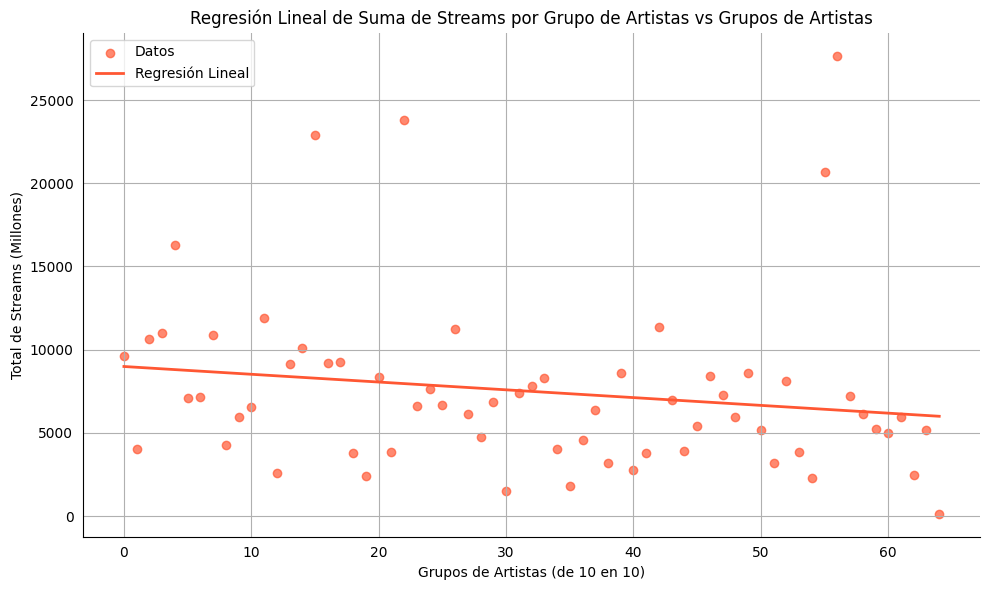


Error Cuadrático Medio (MSE):
Suma de Streams por Grupo de Artistas vs Grupos de Artistas: 25546640939085885440.00

Explicación del gráfico:
- La línea naranja ('Regresión Lineal') representa la tendencia de cómo la suma de streams
  por grupo de artistas afecta al total de streams.
- Los puntos representan los datos observados de la suma de streams por grupo de artistas en relación con
  el total de streams, expresados en millones.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Convertir 'streams' a numérico, ignorando errores
df_cleaned['streams'] = pd.to_numeric(df_cleaned['streams'], errors='coerce')

# Eliminar filas con NaNs en 'streams'
df_cleaned.dropna(subset=['streams'], inplace=True)

# Agrupar por artista y sumar los streams de todos los tracks de cada artista
artist_streams = df_cleaned.groupby('artist_s_name')['streams'].sum().reset_index()

# Verificar que no haya NaNs en 'streams'
if artist_streams['streams'].isnull().any():
    raise ValueError("Existen NaNs en 'streams'. Revisa tus datos.")

# Agrupar artistas en bloques de 10
artist_streams['artist_group'] = pd.cut(artist_streams.index, bins=np.arange(0, len(artist_streams) + 10, 10), labels=False)

# Calcular la suma de streams por cada grupo de artistas
grouped_artist_streams = artist_streams.groupby('artist_group')['streams'].sum().reset_index()

# Crear una secuencia numérica para representar cada grupo de artistas de manera única
group_indices = np.arange(len(grouped_artist_streams))

# Seleccionar las variables de interés para la regresión lineal
X_artist = group_indices.reshape(-1, 1)
y_streams_artist = grouped_artist_streams['streams'].values

# Crear modelo de regresión lineal
model_artist = LinearRegression()
model_artist.fit(X_artist, y_streams_artist)

# Predecir valores de streams usando el modelo
y_streams_pred_artist = model_artist.predict(X_artist)

# Calcular el Error Cuadrático Medio (MSE)
mse_artist = mean_squared_error(y_streams_artist, y_streams_pred_artist)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Scatter plot para Suma de Streams por Grupo de Artistas vs Grupos de Artistas
plt.scatter(group_indices, grouped_artist_streams['streams'] / 1e6, color='#FF5733', label='Datos', alpha=0.7)

# Regresión lineal para Suma de Streams por Grupo de Artistas vs Grupos de Artistas
plt.plot(group_indices, y_streams_pred_artist / 1e6, color='#FF5733', linewidth=2, label='Regresión Lineal')

# Configurar título y etiquetas de ejes
plt.title('Regresión Lineal de Suma de Streams por Grupo de Artistas vs Grupos de Artistas')
plt.xlabel('Grupos de Artistas (de 10 en 10)')
plt.ylabel('Total de Streams (Millones)')

# Ajustar las posiciones de las etiquetas del eje x para mayor claridad
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la leyenda, cuadrícula y ajustar el diseño
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico de dispersión comparativo con regresión lineal
plt.show()

# Mostrar el MSE
print("\nError Cuadrático Medio (MSE):")
print(f"Suma de Streams por Grupo de Artistas vs Grupos de Artistas: {mse_artist:.2f}")

# Explicación del gráfico:
print("\nExplicación del gráfico:")
print("- La línea naranja ('Regresión Lineal') representa la tendencia de cómo la suma de streams")
print("  por grupo de artistas afecta al total de streams.")
print("- Los puntos representan los datos observados de la suma de streams por grupo de artistas en relación con")
print("  el total de streams, expresados en millones.")


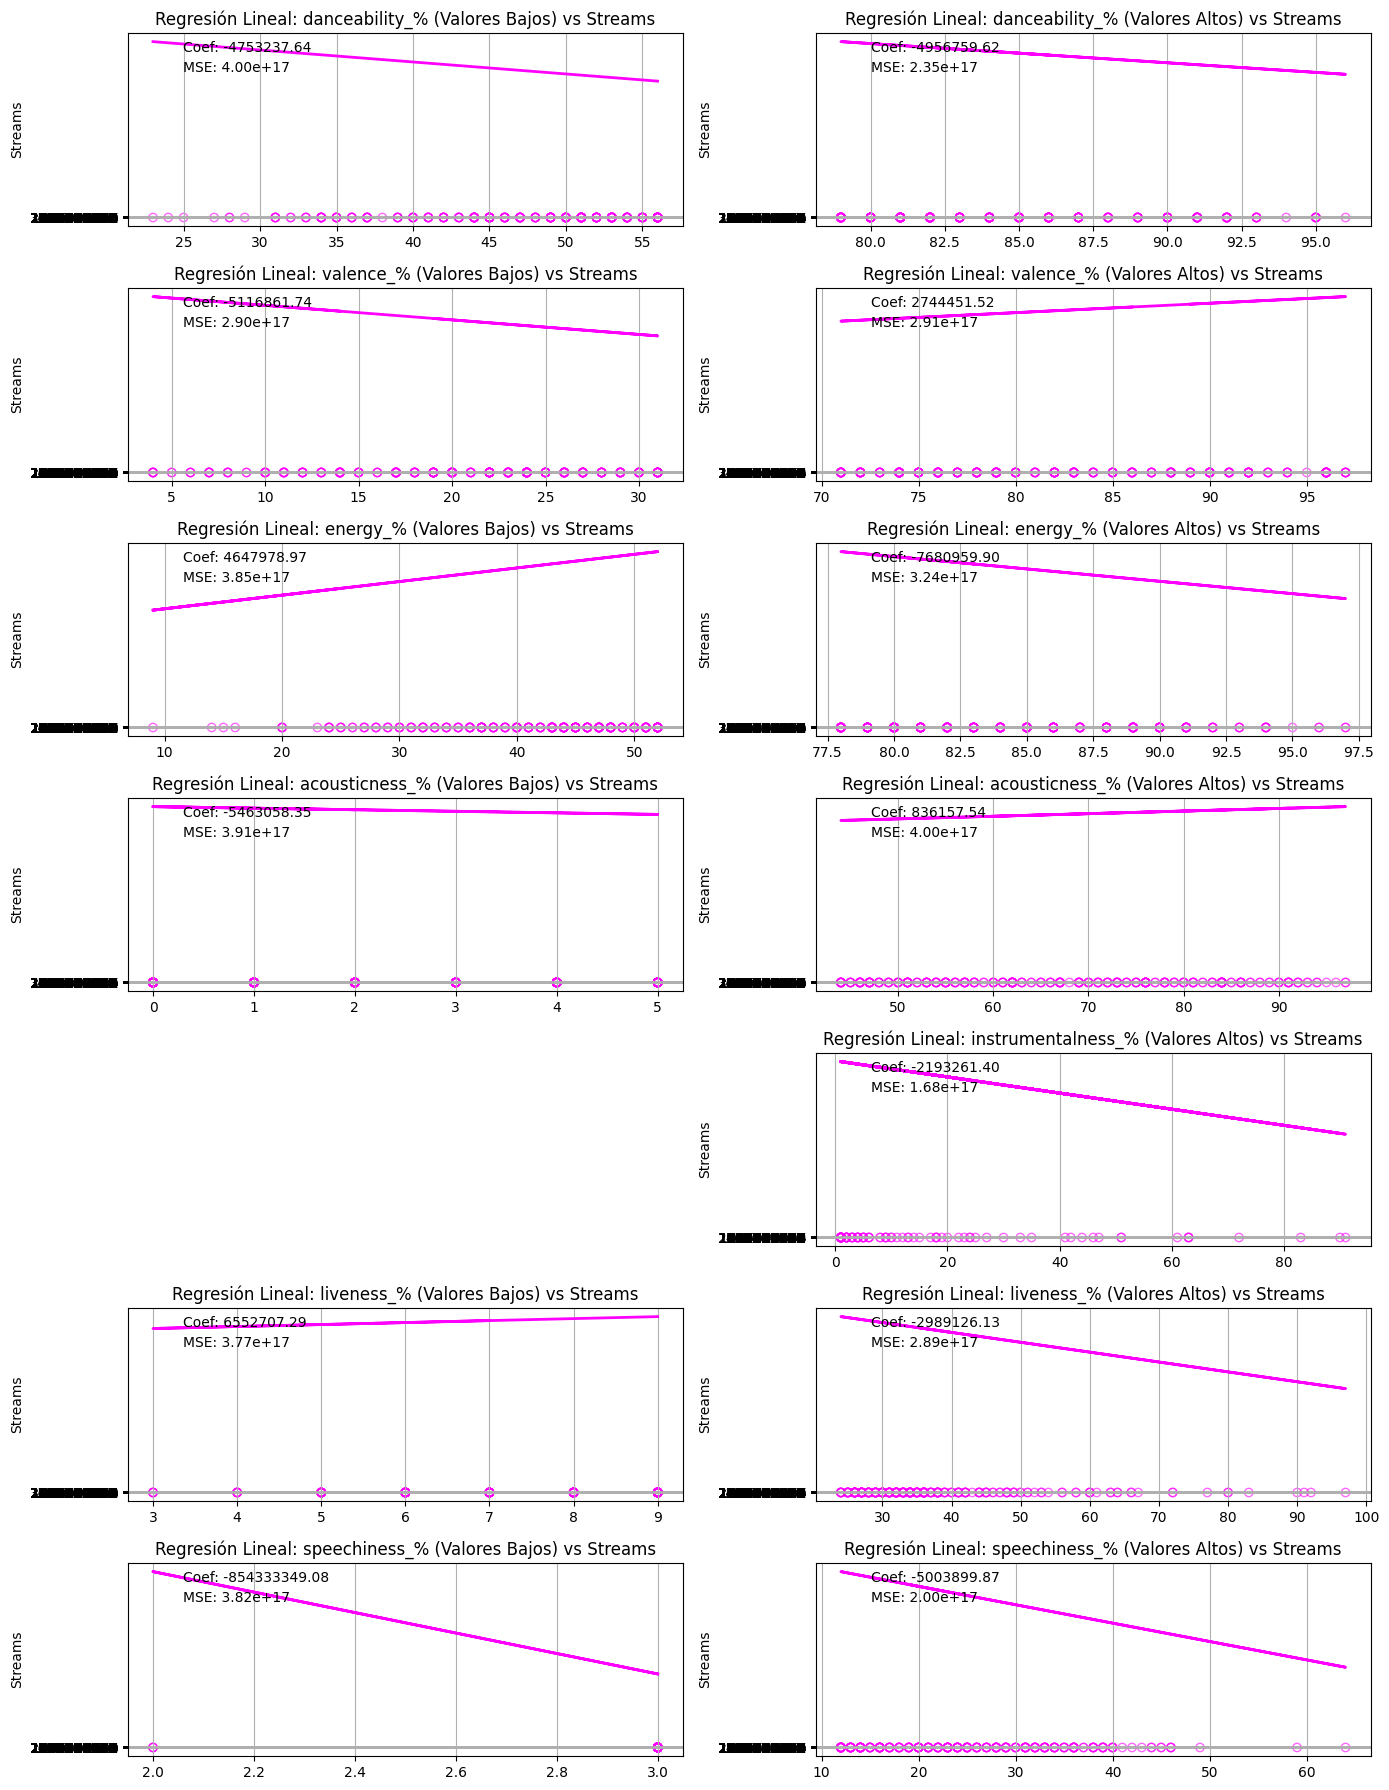

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que ya tienes df_cleaned con los datos cargados y limpios

# Definir las variables de interés
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = df_cleaned[features].values
y = df_cleaned['streams'].values

# Inicializar listas para almacenar resultados
coefficients = []
mse_scores = []

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 18))

# Función para convertir valores RGB de 0-255 a 0-1
def rgb_norm(rgb_tuple):
    return tuple(np.array(rgb_tuple) / 255)

# Iterar sobre cada característica y ajustar un modelo de regresión lineal
for i, feature in enumerate(features):
    # Calcular los percentiles 25 y 75 para dividir en valores bajos y altos
    low_threshold = np.percentile(df_cleaned[feature], 25)
    high_threshold = np.percentile(df_cleaned[feature], 75)

    # Filtrar los datos en valores bajos y altos
    low_data = df_cleaned[df_cleaned[feature] < low_threshold]
    high_data = df_cleaned[df_cleaned[feature] > high_threshold]

    # Aplicar transformación logarítmica solo si los datos de 'streams' son numéricos
    if pd.api.types.is_numeric_dtype(low_data['streams']):
        low_data['streams'] = np.log1p(low_data['streams'])

    if pd.api.types.is_numeric_dtype(high_data['streams']):
        high_data['streams'] = np.log1p(high_data['streams'])

    # Verificar si hay datos disponibles para valores bajos y altos
    if not low_data.empty:
        # Configurar subplots para valores bajos
        plt.subplot(7, 2, 2*i+1)
        model_low = LinearRegression()
        model_low.fit(low_data[[feature]], low_data['streams'])
        y_pred_low = model_low.predict(low_data[[feature]])
        plt.scatter(low_data[feature], low_data['streams'], edgecolor=rgb_norm((255, 0, 255)), facecolor='none', alpha=0.6)
        plt.plot(low_data[feature], y_pred_low, color=rgb_norm((255, 0, 255)), linewidth=2)
        plt.title(f'Regresión Lineal: {feature} (Valores Bajos) vs Streams')
        plt.ylabel('Streams')
        plt.grid(True)
        plt.text(0.1, 0.9, f'Coef: {model_low.coef_[0]:.2f}', transform=plt.gca().transAxes)
        mse_low = mean_squared_error(low_data['streams'], y_pred_low)
        plt.text(0.1, 0.8, f'MSE: {mse_low:.2e}', transform=plt.gca().transAxes)

        # Guardar coeficientes y MSE para valores bajos
        coefficients.append((model_low.coef_[0], None))  # None para valores altos
        mse_scores.append((mse_low, None))  # None para valores altos

    if not high_data.empty:
        # Configurar subplots para valores altos
        plt.subplot(7, 2, 2*i+2)
        model_high = LinearRegression()
        model_high.fit(high_data[[feature]], high_data['streams'])
        y_pred_high = model_high.predict(high_data[[feature]])
        plt.scatter(high_data[feature], high_data['streams'], edgecolor=rgb_norm((255, 0, 255)), facecolor='none', alpha=0.6)
        plt.plot(high_data[feature], y_pred_high, color=rgb_norm((255, 0, 255)), linewidth=2)
        plt.title(f'Regresión Lineal: {feature} (Valores Altos) vs Streams')
        plt.ylabel('Streams')
        plt.grid(True)
        plt.text(0.1, 0.9, f'Coef: {model_high.coef_[0]:.2f}', transform=plt.gca().transAxes)
        mse_high = mean_squared_error(high_data['streams'], y_pred_high)
        plt.text(0.1, 0.8, f'MSE: {mse_high:.2e}', transform=plt.gca().transAxes)

        # Actualizar coeficientes y MSE para valores altos
        if i < len(coefficients):
            coefficients[i] = (coefficients[i][0], model_high.coef_[0])
            mse_scores[i] = (mse_scores[i][0], mse_high)
        else:
            coefficients.append((None, model_high.coef_[0]))
            mse_scores.append((None, mse_high))

# Ajustar el diseño del gráfico general
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Comparar los resultados de los coeficientes y MSE
print("Resumen:")
for i, feature in enumerate(features):
    print(f"Característica: {feature}")
    if coefficients[i][0] is not None:
        print(f"Coeficiente de regresión (Valores Bajos): {coefficients[i][0]:.2f}")
        print(f"MSE (Valores Bajos): {mse_scores[i][0]:.2e}")
    else:
        print("No hay suficientes datos para valores bajos.")

    if coefficients[i][1] is not None:
        print(f"Coeficiente de regresión (Valores Altos): {coefficients[i][1]:.2f}")
        print(f"MSE (Valores Altos): {mse_scores[i][1]:.2e}")
    else:
        print("No hay suficientes datos para valores altos.")

    print("--------------------------------------")


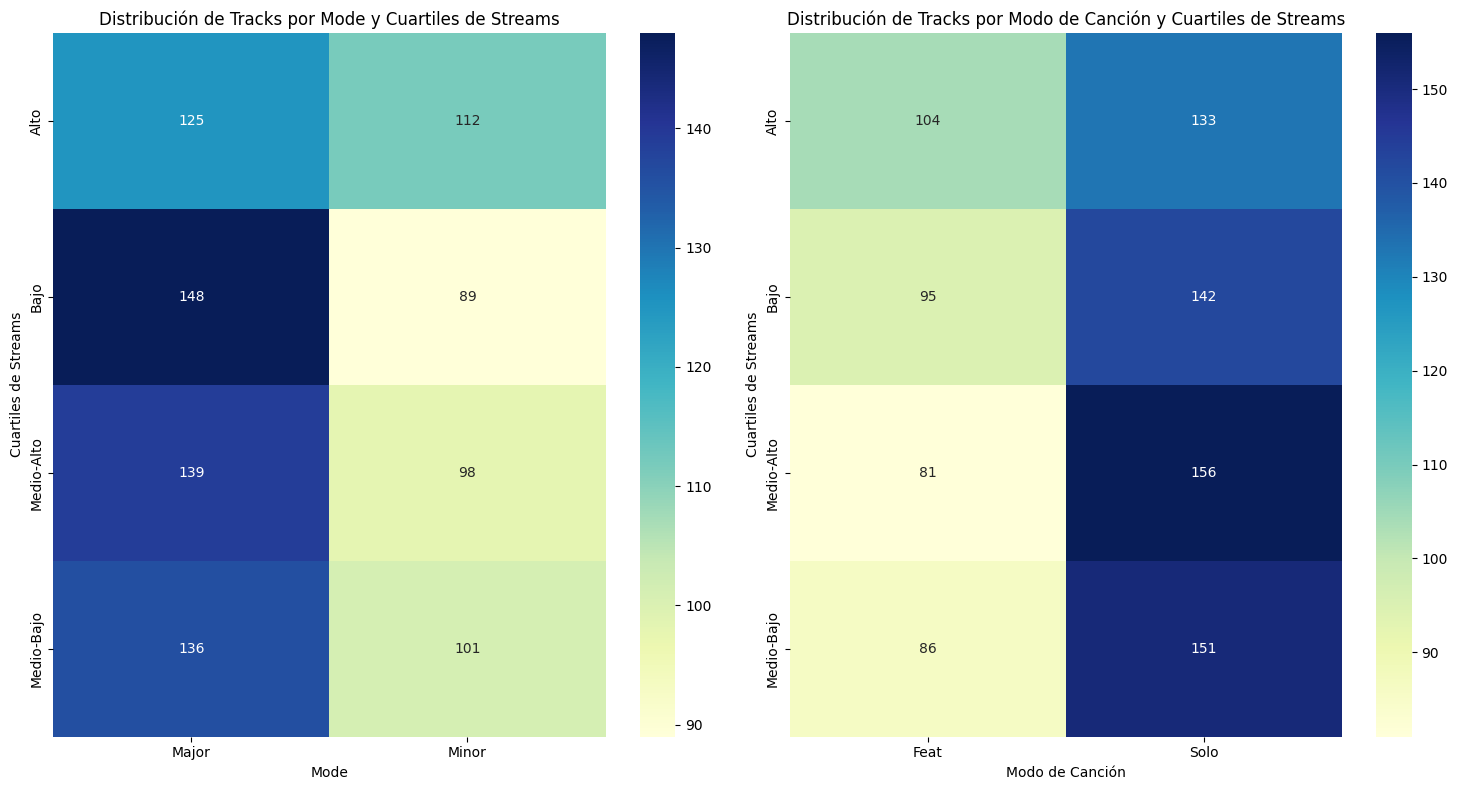

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los nombres de los cuartiles
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df_cleaned['cuartiles_categoria'] = df_cleaned['cuartiles_streams'].map(cuartiles_dict)

# Crear una tabla pivot para el heatmap con mode
pivot_table_mode = df_cleaned.pivot_table(index='cuartiles_categoria', columns='mode', values='track_id', aggfunc='count', fill_value=0)

# Crear una tabla pivot para el heatmap con modo de canción
pivot_table_modocancion = df_cleaned.pivot_table(index='cuartiles_categoria', columns='modo_cancion', values='track_id', aggfunc='count', fill_value=0)

# Configurar tamaño de la figura
plt.figure(figsize=(15, 8))

# Primer heatmap para mode
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_mode, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribución de Tracks por Mode y Cuartiles de Streams')
plt.xlabel('Mode')
plt.ylabel('Cuartiles de Streams')

# Segundo heatmap para modo de canción
plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_modocancion, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Distribución de Tracks por Modo de Canción y Cuartiles de Streams')
plt.xlabel('Modo de Canción')
plt.ylabel('Cuartiles de Streams')

# Ajustar espaciado y mostrar la figura
plt.tight_layout()
plt.show()


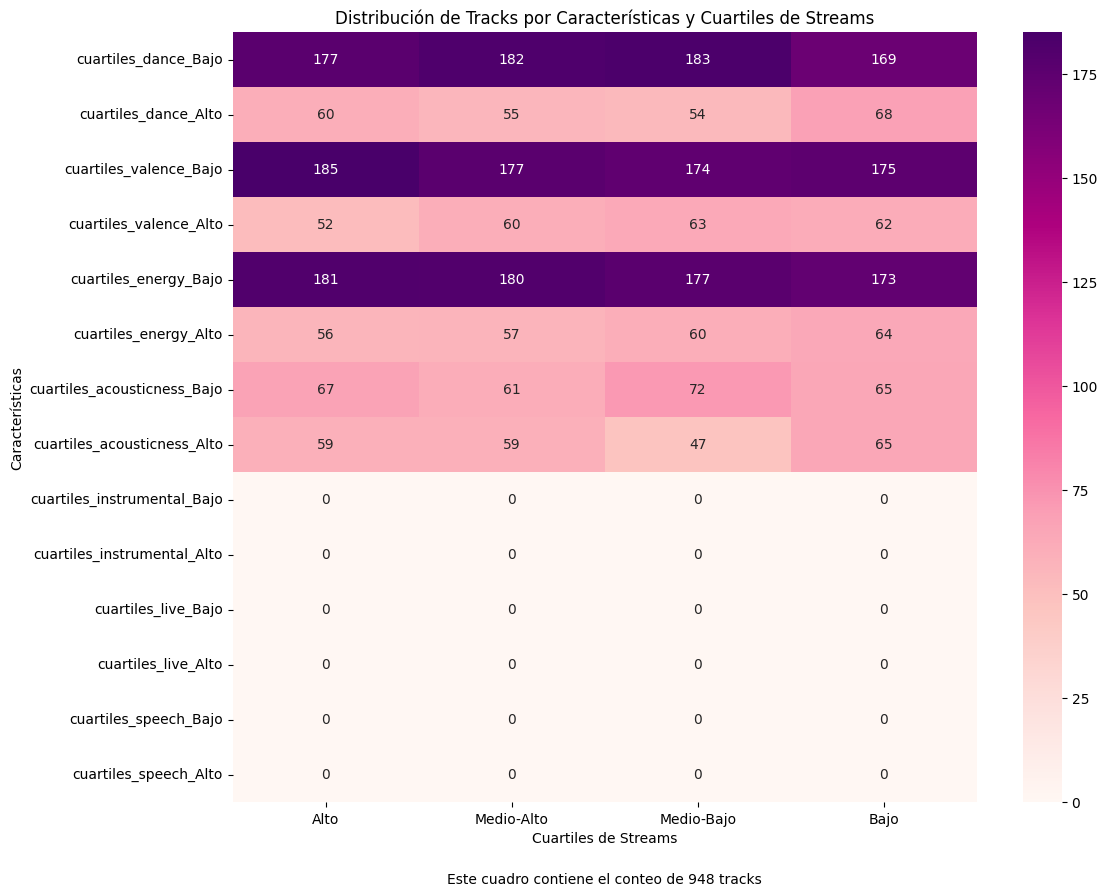

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes df_cleaned con los datos cargados y limpios

# Definir nombres y orden de cuartiles para streams y características
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
cuartiles_features_order = {
    'cuartiles_dance': ['Bajo', 'Alto'],
    'cuartiles_valence': ['Bajo', 'Alto'],
    'cuartiles_energy': ['Bajo', 'Alto'],
    'cuartiles_acousticness': ['Bajo', 'Alto'],
    'cuartiles_instrumental': ['Bajo', 'Alto'],
    'cuartiles_live': ['Bajo', 'Alto'],
    'cuartiles_speech': ['Bajo', 'Alto']
}

# Función para contar tracks por combinación de características y cuartiles de streams
def count_tracks(df, feature, cuartile):
    counts = {}
    for cuartile_value in cuartiles_features_order[feature]:
        counts[cuartile_value] = df[(df['cuartiles_streams'] == cuartile) & (df[feature] == cuartile_value)].shape[0]
    return counts

# Crear DataFrame para el heatmap
heatmap_data = pd.DataFrame()

# Generar los datos para el heatmap
for feature, cuartiles in cuartiles_features_order.items():
    for cuartile in cuartiles_dict.keys():
        count = count_tracks(df_cleaned, feature, cuartile)
        for cuartile_value in cuartiles:
            heatmap_data.loc[f"{feature}_{cuartile_value}", cuartiles_dict[cuartile]] = count.get(cuartile_value, 0)

# Crear el heatmap usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap=sns.color_palette("RdPu", as_cmap=True))
plt.title('Distribución de Tracks por Características y Cuartiles de Streams')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Características')

# Agregar texto con el conteo de tracks
plt.text(0.5, -0.1, f"Este cuadro contiene el conteo de {df_cleaned.shape[0]} tracks",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('heatmap_tracks_count.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# Datos de promedios por cuartiles de categoría para bpm y streams
promedios = pd.DataFrame({
    'cuartiles_categoria': ['Alto', 'Bajo', 'Medio-Alto', 'Medio-Bajo'],
    'bpm': [123.240506, 120.860759, 120.915612, 124.978903],
    'streams': [454339300.0, 600168900.0, 373394900.0, 628908500.0]
})

# Calcular el promedio de bpm por cuartiles_categoria
promedios_bpm = promedios.groupby('cuartiles_categoria')['bpm'].mean().reset_index()
print("Promedios por cuartiles de categoría para bpm:")
print(promedios_bpm)

# Calcular el promedio de streams por cuartiles_categoria
promedios_streams = promedios.groupby('cuartiles_categoria')['streams'].mean().reset_index()
print("\nPromedios por cuartiles de categoría para streams:")
print(promedios_streams)

# Obtener datos para las pruebas de hipótesis
bpm_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'bpm']
bpm_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'bpm']
bpm_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'bpm']
bpm_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'bpm']

# Realizar pruebas de hipótesis
# Test t de Student para bpm entre cuartiles Alto y Bajo
t_statistic_bpm_ab, p_value_bpm_ab = stats.ttest_ind(bpm_alto, bpm_bajo, equal_var=False)
print(f"\nPara cuartiles de categoría Alto y Bajo:")
print(f"T-statistic (bpm): {t_statistic_bpm_ab}, p-value (bpm): {p_value_bpm_ab}")

# Test t de Student para bpm entre cuartiles Medio-Alto y Medio-Bajo
t_statistic_bpm_mm, p_value_bpm_mm = stats.ttest_ind(bpm_medio_alto, bpm_medio_bajo, equal_var=False)
print(f"\nPara cuartiles de categoría Medio-Alto y Medio-Bajo:")
print(f"T-statistic (bpm): {t_statistic_bpm_mm}, p-value (bpm): {p_value_bpm_mm}")

from scipy import stats

# Obtener datos para las pruebas de hipótesis usando promedios
bpm_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'bpm']
bpm_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'bpm']
bpm_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'bpm']
bpm_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'bpm']

# Test de Wilcoxon-Mann-Whitney para bpm entre cuartiles Alto y Bajo
w_statistic_bpm_ab, p_value_bpm_ab = stats.mannwhitneyu(bpm_alto, bpm_bajo)
print(f"\nPara cuartiles de categoría Alto y Bajo:")
print(f"U-statistic (bpm): {w_statistic_bpm_ab}, p-value (bpm): {p_value_bpm_ab}")

# Test de Wilcoxon-Mann-Whitney para bpm entre cuartiles Medio-Alto y Medio-Bajo
w_statistic_bpm_mm, p_value_bpm_mm = stats.mannwhitneyu(bpm_medio_alto, bpm_medio_bajo)
print(f"\nPara cuartiles de categoría Medio-Alto y Medio-Bajo:")
print(f"U-statistic (bpm): {w_statistic_bpm_mm}, p-value (bpm): {p_value_bpm_mm}")



Promedios por cuartiles de categoría para bpm:
  cuartiles_categoria         bpm
0                Alto  123.240506
1                Bajo  120.860759
2          Medio-Alto  120.915612
3          Medio-Bajo  124.978903

Promedios por cuartiles de categoría para streams:
  cuartiles_categoria      streams
0                Alto  454339300.0
1                Bajo  600168900.0
2          Medio-Alto  373394900.0
3          Medio-Bajo  628908500.0

Para cuartiles de categoría Alto y Bajo:
T-statistic (bpm): nan, p-value (bpm): nan

Para cuartiles de categoría Medio-Alto y Medio-Bajo:
T-statistic (bpm): nan, p-value (bpm): nan

Para cuartiles de categoría Alto y Bajo:
U-statistic (bpm): 1.0, p-value (bpm): 1.0

Para cuartiles de categoría Medio-Alto y Medio-Bajo:
U-statistic (bpm): 0.0, p-value (bpm): 1.0


Para cuartiles de categoría Alto y Bajo:

U-Statistic (bpm): 1.0
p-value (bpm): 1.0
El valor p (p-value) es 1.0, lo cual es alto y sugiere que no hay diferencia significativa en los promedios de bpm entre los cuartiles de categoría Alto y Bajo. Esto significa que no podemos rechazar la hipótesis nula de que los promedios de bpm son iguales entre estos dos grupos.

Para cuartiles de categoría Medio-Alto y Medio-Bajo:

U-Statistic (bpm): 0.0
p-value (bpm): 1.0
En este caso, nuevamente el valor p (p-value) es 1.0, indicando que no hay diferencia significativa en los promedios de bpm entre los cuartiles de categoría Medio-Alto y Medio-Bajo. No podemos rechazar la hipótesis nula de que los promedios de bpm son iguales entre estos dos grupos.

Interpretación General:
Los valores altos de p-value (cerca de 1.0) sugieren que no hay suficiente evidencia para afirmar que existen diferencias significativas en los promedios de bpm entre los grupos comparados (Alto vs Bajo y Medio-Alto vs Medio-Bajo).
Esto puede indicar que, desde el punto de vista estadístico, los promedios de bpm no varían significativamente entre los cuartiles de categoría que has analizado.

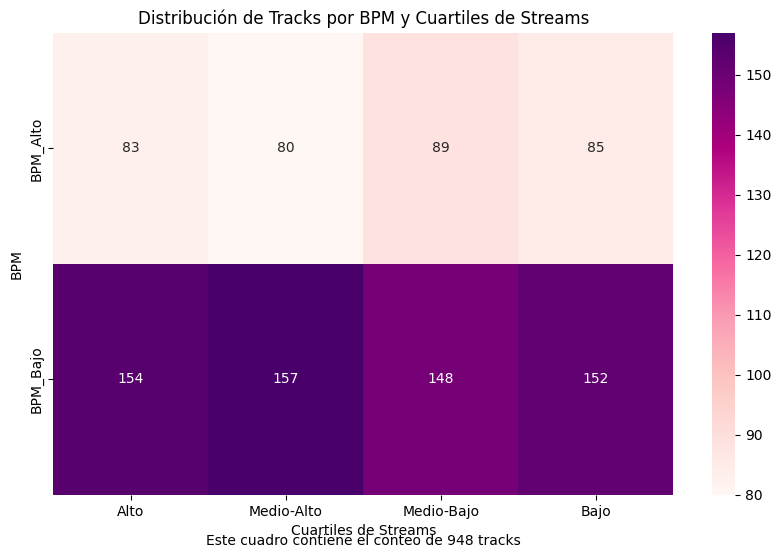

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes df_cleaned con los datos cargados y limpios

# Definir nombres y orden de cuartiles para streams
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}

# Clasificar BPM en Alto y Bajo
df_cleaned['BPM'] = df_cleaned['bpm'].apply(lambda x: 'Alto' if x > 130 else 'Bajo')

# Crear DataFrame para el heatmap
heatmap_data = pd.DataFrame(index=['BPM_Alto', 'BPM_Bajo'], columns=cuartiles_dict.values())

# Contar tracks por combinación de BPM y cuartiles de streams
for cuartile, cuartile_name in cuartiles_dict.items():
    bpm_alto_count = df_cleaned[(df_cleaned['cuartiles_streams'] == cuartile) & (df_cleaned['BPM'] == 'Alto')].shape[0]
    bpm_bajo_count = df_cleaned[(df_cleaned['cuartiles_streams'] == cuartile) & (df_cleaned['BPM'] == 'Bajo')].shape[0]
    heatmap_data.loc['BPM_Alto', cuartile_name] = bpm_alto_count
    heatmap_data.loc['BPM_Bajo', cuartile_name] = bpm_bajo_count

# Asegurarse de que los valores en heatmap_data sean numéricos
heatmap_data = heatmap_data.astype(int)

# Crear el heatmap usando seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap=sns.color_palette("RdPu", as_cmap=True))
plt.title('Distribución de Tracks por BPM y Cuartiles de Streams')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('BPM')

# Agregar texto con el conteo de tracks
plt.text(0.5, -0.1, f"Este cuadro contiene el conteo de {df_cleaned.shape[0]} tracks",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.savefig('heatmap_tracks_count.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
from scipy import stats

# Datos de ejemplo con más valores en cada categoría de cuartiles
promedios = pd.DataFrame({
    'cuartiles_categoria': ['Alto', 'Alto', 'Alto', 'Bajo', 'Bajo', 'Bajo', 'Medio-Alto', 'Medio-Alto', 'Medio-Alto', 'Medio-Bajo', 'Medio-Bajo', 'Medio-Bajo'],
    'bpm': [123.24, 122.15, 124.05, 120.86, 119.75, 121.95, 120.91, 121.10, 120.73, 124.97, 125.30, 124.65],
    'streams': [454339300.0, 460000000.0, 450000000.0, 600168900.0, 605000000.0, 595000000.0, 373394900.0, 370000000.0, 375000000.0, 628908500.0, 630000000.0, 627000000.0]
})

# Obtener datos para las pruebas de Shapiro-Wilk
bpm_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'bpm']
bpm_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'bpm']
bpm_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'bpm']
bpm_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'bpm']

streams_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Alto', 'streams']
streams_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Bajo', 'streams']
streams_medio_alto = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Alto', 'streams']
streams_medio_bajo = promedios.loc[promedios['cuartiles_categoria'] == 'Medio-Bajo', 'streams']

# Prueba de Shapiro-Wilk para bpm
sw_stat_bpm_alto, sw_pvalue_bpm_alto = stats.shapiro(bpm_alto)
sw_stat_bpm_bajo, sw_pvalue_bpm_bajo = stats.shapiro(bpm_bajo)
sw_stat_bpm_medio_alto, sw_pvalue_bpm_medio_alto = stats.shapiro(bpm_medio_alto)
sw_stat_bpm_medio_bajo, sw_pvalue_bpm_medio_bajo = stats.shapiro(bpm_medio_bajo)

# Prueba de Shapiro-Wilk para streams
sw_stat_streams_alto, sw_pvalue_streams_alto = stats.shapiro(streams_alto)
sw_stat_streams_bajo, sw_pvalue_streams_bajo = stats.shapiro(streams_bajo)
sw_stat_streams_medio_alto, sw_pvalue_streams_medio_alto = stats.shapiro(streams_medio_alto)
sw_stat_streams_medio_bajo, sw_pvalue_streams_medio_bajo = stats.shapiro(streams_medio_bajo)

# Resultados de la prueba de Shapiro-Wilk para bpm
print("Prueba de Shapiro-Wilk para bpm:")
print(f"Alto: W-statistic = {sw_stat_bpm_alto}, p-value = {sw_pvalue_bpm_alto}")
print(f"Bajo: W-statistic = {sw_stat_bpm_bajo}, p-value = {sw_pvalue_bpm_bajo}")
print(f"Medio-Alto: W-statistic = {sw_stat_bpm_medio_alto}, p-value = {sw_pvalue_bpm_medio_alto}")
print(f"Medio-Bajo: W-statistic = {sw_stat_bpm_medio_bajo}, p-value = {sw_pvalue_bpm_medio_bajo}")

# Resultados de la prueba de Shapiro-Wilk para streams
print("\nPrueba de Shapiro-Wilk para streams:")
print(f"Alto: W-statistic = {sw_stat_streams_alto}, p-value = {sw_pvalue_streams_alto}")
print(f"Bajo: W-statistic = {sw_stat_streams_bajo}, p-value = {sw_pvalue_streams_bajo}")
print(f"Medio-Alto: W-statistic = {sw_stat_streams_medio_alto}, p-value = {sw_pvalue_streams_medio_alto}")
print(f"Medio-Bajo: W-statistic = {sw_stat_streams_medio_bajo}, p-value = {sw_pvalue_streams_medio_bajo}")


Prueba de Shapiro-Wilk para bpm:
Alto: W-statistic = 0.9928126931190491, p-value = 0.8378913895823441
Bajo: W-statistic = 0.9999725222587585, p-value = 0.9899886214932185
Medio-Alto: W-statistic = 0.9997566342353821, p-value = 0.9702046331711544
Medio-Bajo: W-statistic = 0.9999210834503174, p-value = 0.9830335440217016

Prueba de Shapiro-Wilk para streams:
Alto: W-statistic = 0.9942134022712708, p-value = 0.8545771126470447
Bajo: W-statistic = 0.9996199607849121, p-value = 0.9627657083738281
Medio-Alto: W-statistic = 0.9590379595756531, p-value = 0.6107732636416966
Medio-Bajo: W-statistic = 0.975874662399292, p-value = 0.7021483683485774


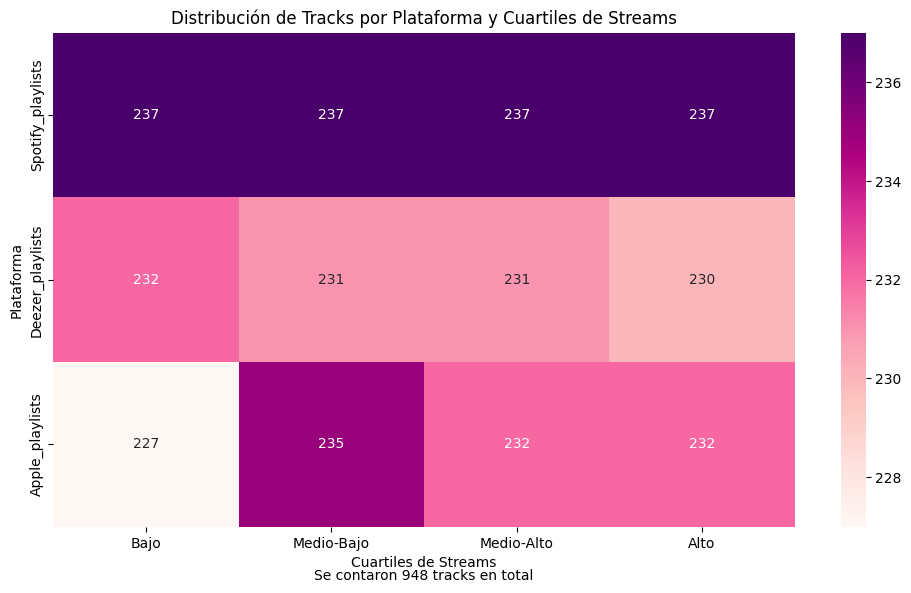

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir nombres y orden de cuartiles para streams y características
cuartiles_dict = {1: 'Bajo', 2: 'Medio-Bajo', 3: 'Medio-Alto', 4: 'Alto'}

# Función para contar tracks por combinación de cuartiles de streams y aparición en playlists
def count_tracks(df):
    heatmap_data = pd.DataFrame(index=['Spotify', 'Deezer', 'Apple'], columns=cuartiles_dict.values(), dtype=float)

    for cuartile, cuartile_name in cuartiles_dict.items():
        for platform in ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']:
            # Conteo de tracks que cumplen las condiciones especificadas
            counts = df[(df['cuartiles_streams'] == cuartile) &
                        (df[platform].notnull()) &
                        (df[platform] > 0)].shape[0]
            heatmap_data.loc[platform.replace('in_', '').capitalize(), cuartile_name] = counts

    return heatmap_data

# Llamada a la función count_tracks
heatmap_data = count_tracks(df_cleaned)

# Eliminar filas que están completamente vacías
heatmap_data = heatmap_data.dropna(how='all')

# Crear el heatmap usando seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdPu", cbar_kws={'format': '%.0f'})
plt.title('Distribución de Tracks por Plataforma y Cuartiles de Streams')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Plataforma')

# Mostrar el conteo total de tracks en el DataFrame df_cleaned
plt.text(0.5, -0.1, f"Se contaron {df_cleaned.shape[0]} tracks en total",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('heatmap_tracks_platforms.png', dpi=300)
plt.show()


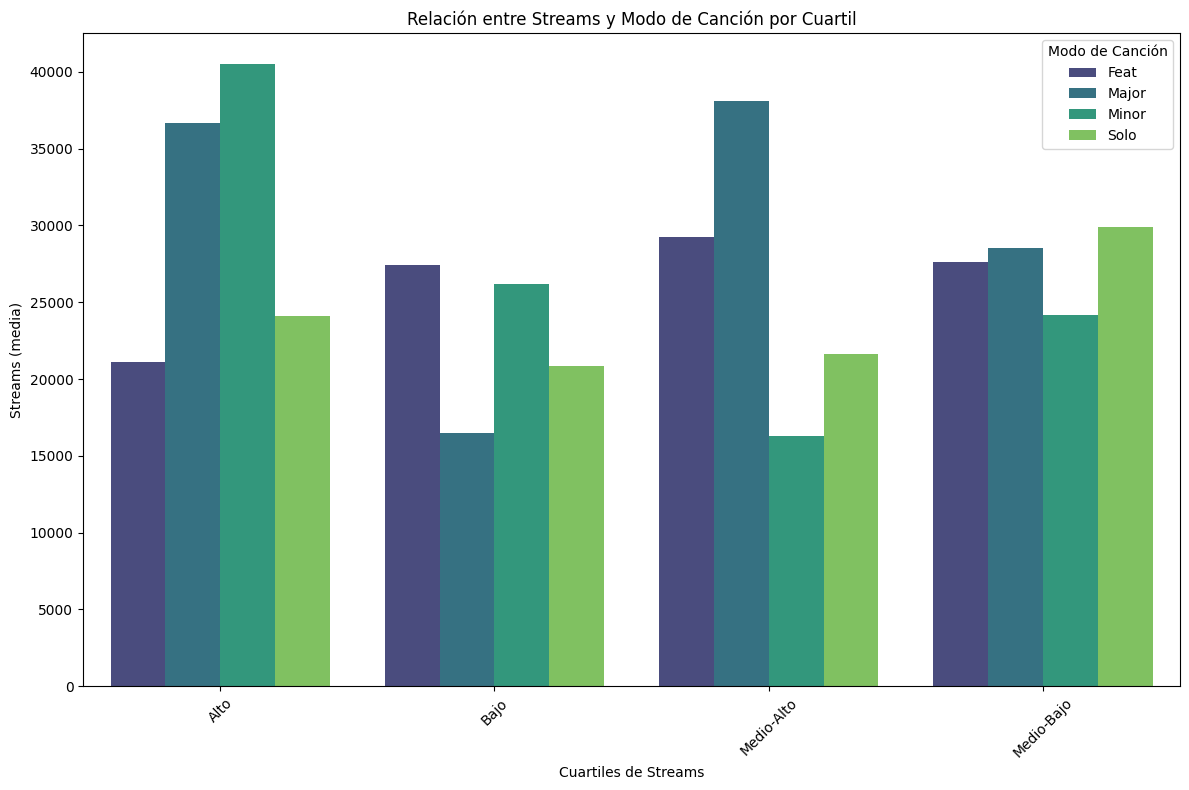

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Ejemplo de DataFrame con datos ficticios
data = {
    'streams': np.random.randint(1000, 50000, 100),
    'cuartiles_streams': np.random.choice([1, 2, 3, 4], 100),
    'modo_cancion': np.random.choice(['Minor', 'Major', 'Feat', 'Solo'], 100)
}
df = pd.DataFrame(data)

# Definir nombres de cuartiles y modos de canción
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df['cuartiles_categoria'] = df['cuartiles_streams'].map(cuartiles_dict)

# Calcular medias de streams por cuartil y modo de canción
means = df.groupby(['cuartiles_categoria', 'modo_cancion'])['streams'].mean().reset_index()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
sns.barplot(x='cuartiles_categoria', y='streams', hue='modo_cancion', data=means, palette='viridis')

# Añadir detalles al gráfico
plt.title('Relación entre Streams y Modo de Canción por Cuartil')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Streams (media)')
plt.xticks(rotation=45)
plt.legend(title='Modo de Canción')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


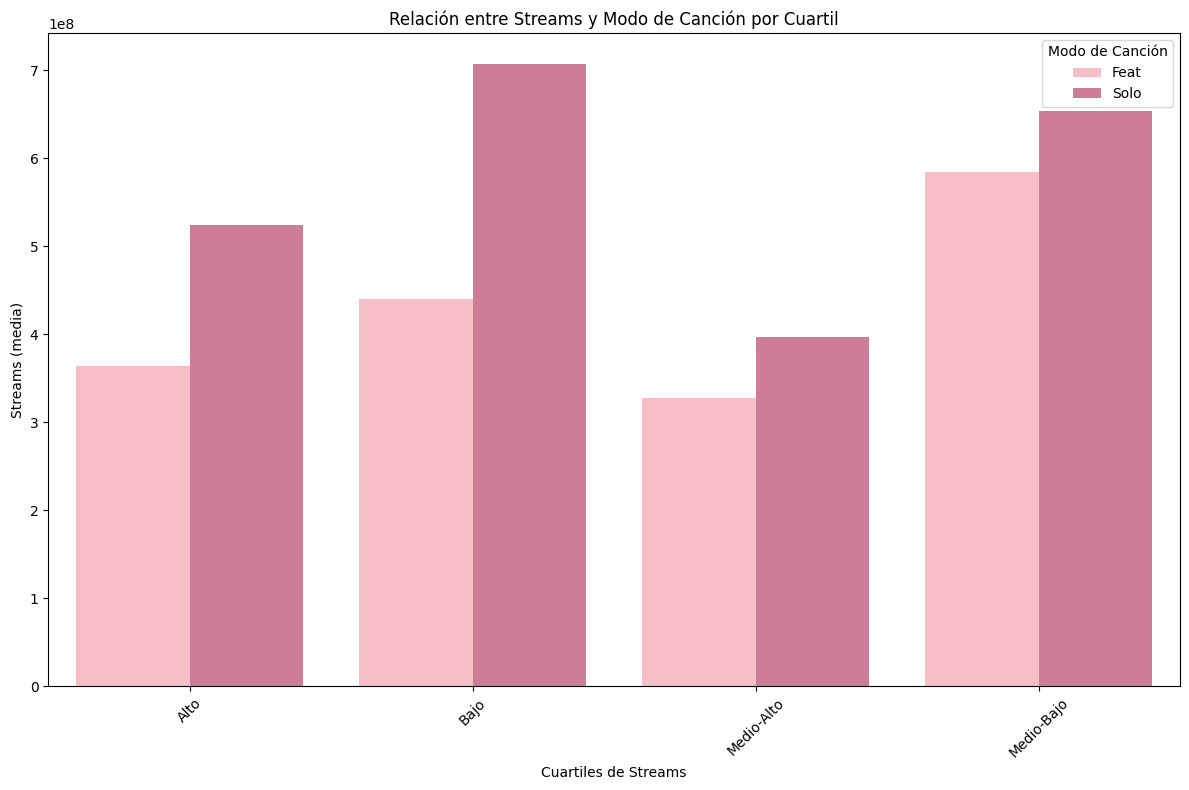

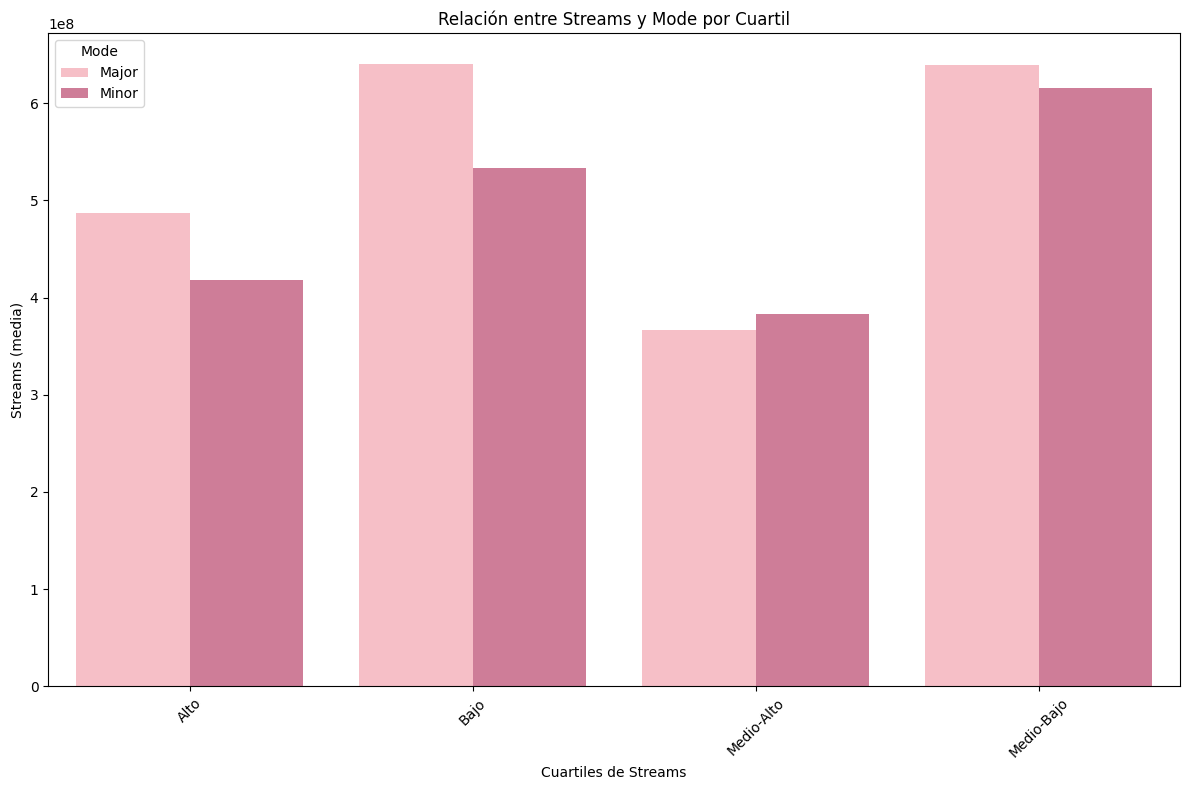

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, pearsonr

# Definir nombres de cuartiles y modos de canción
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df_cleaned['cuartiles_categoria'] = df_cleaned['cuartiles_streams'].map(cuartiles_dict)

# Función para realizar prueba Shapiro-Wilk
def test_shapiro(df, grupo, caracteristica):
    grupo_data = df[df['cuartiles_categoria'] == grupo][caracteristica]
    stat, p_value = shapiro(grupo_data)
    return p_value

# Función para realizar prueba de t-test
def test_t(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df['cuartiles_categoria'] == grupo1][caracteristica]
    grupo2_data = df[df['cuartiles_categoria'] == grupo2][caracteristica]
    stat, p_value = ttest_ind(grupo1_data, grupo2_data, equal_var=False)
    return p_value

# Función para realizar prueba de Wilcoxon-Mann-Whitney
def test_wilcoxon(df, grupo1, grupo2, caracteristica):
    grupo1_data = df[df['cuartiles_categoria'] == grupo1][caracteristica]
    grupo2_data = df[df['cuartiles_categoria'] == grupo2][caracteristica]
    stat, p_value = mannwhitneyu(grupo1_data, grupo2_data)
    return p_value

# Función para calcular correlación de Pearson
def test_pearson(df, grupo, caracteristica):
    grupo_data = df[df['cuartiles_categoria'] == grupo]
    correlation, p_value = pearsonr(grupo_data['streams'], grupo_data[caracteristica])
    return correlation, p_value

# Calcular medias de streams por cuartil y modo de canción
means_modo_cancion = df_cleaned.groupby(['cuartiles_categoria', 'modo_cancion'])['streams'].mean().reset_index()
means_mode = df_cleaned.groupby(['cuartiles_categoria', 'mode'])['streams'].mean().reset_index()

# Gráfico de barras para visualizar las medias por modo de canción
plt.figure(figsize=(12, 8))
sns.barplot(x='cuartiles_categoria', y='streams', hue='modo_cancion', data=means_modo_cancion, palette=['#FFB6C1', '#DB7093'])
plt.title('Relación entre Streams y Modo de Canción por Cuartil')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Streams (media)')
plt.xticks(rotation=45)
plt.legend(title='Modo de Canción')
plt.tight_layout()
plt.show()

# Gráfico de barras para visualizar las medias por modo (Minor/Major)
plt.figure(figsize=(12, 8))
sns.barplot(x='cuartiles_categoria', y='streams', hue='mode', data=means_mode, palette=['#FFB6C1', '#DB7093'])
plt.title('Relación entre Streams y Mode por Cuartil')
plt.xlabel('Cuartiles de Streams')
plt.ylabel('Streams (media)')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.tight_layout()
plt.show()


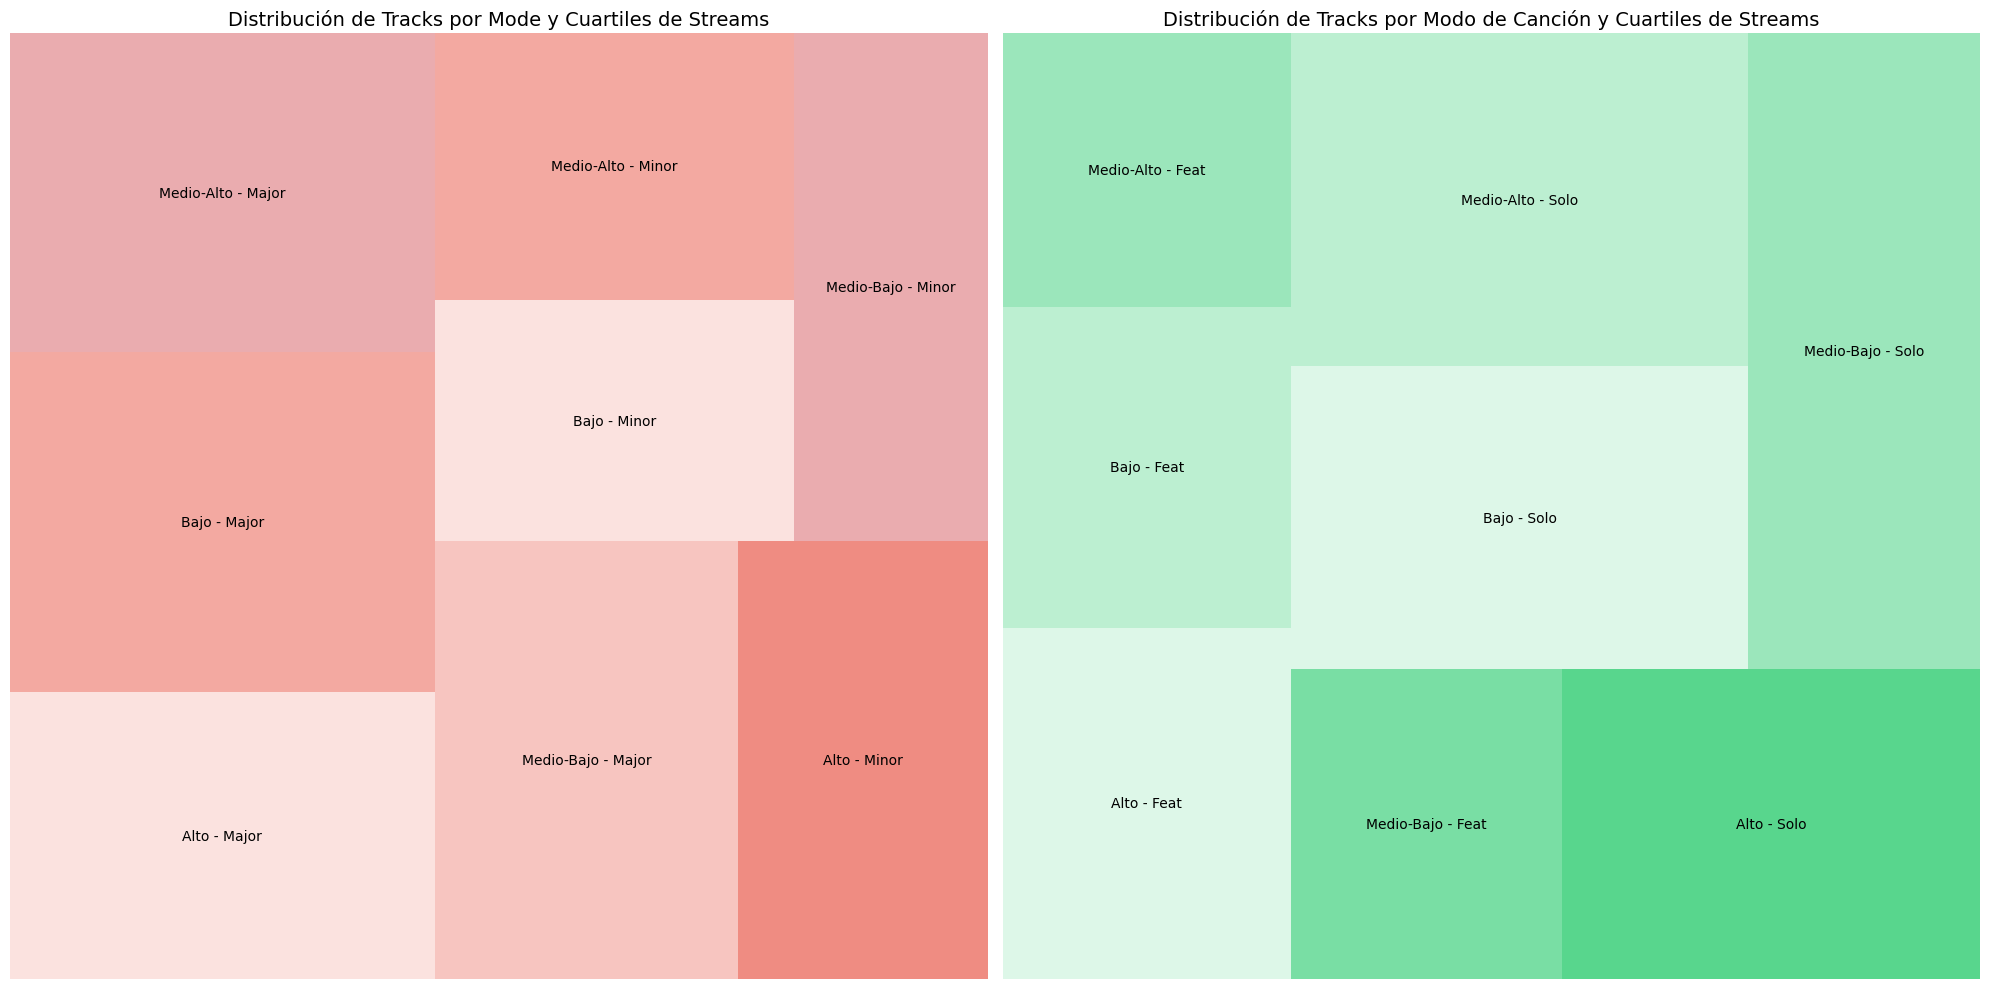

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# Definir los nombres de los cuartiles
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df_cleaned['cuartiles_categoria'] = df_cleaned['cuartiles_streams'].map(cuartiles_dict)

# Crear tablas pivot para los gráficos
pivot_table_mode = df_cleaned.pivot_table(index='cuartiles_categoria', columns='mode', values='track_id', aggfunc='count', fill_value=0)
pivot_table_modocancion = df_cleaned.pivot_table(index='cuartiles_categoria', columns='modo_cancion', values='track_id', aggfunc='count', fill_value=0)

# Convertir las tablas pivot a formato adecuado para el gráfico
df_mode = pivot_table_mode.reset_index().melt(id_vars='cuartiles_categoria', var_name='mode', value_name='count')
df_modocancion = pivot_table_modocancion.reset_index().melt(id_vars='cuartiles_categoria', var_name='modo_cancion', value_name='count')

# Definir paletas de colores femeninos
palette_rosas = ['#FADBD8', '#F1948A', '#E5989B', '#F5B7B1', '#EC7063']  # Tonos de rosa suaves
palette_verdes = ['#D5F5E3', '#ABEBC6', '#82E0AA', '#58D68D', '#2ECC71']  # Tonos de verde suaves

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Primer treemap para mode con paleta de rosas suaves
plt.subplot(1, 2, 1)
squarify.plot(sizes=df_mode['count'], label=df_mode['cuartiles_categoria'] + ' - ' + df_mode['mode'], alpha=.8, color=palette_rosas)
plt.title('Distribución de Tracks por Mode y Cuartiles de Streams', fontsize=14)
plt.axis('off')

# Segundo treemap para modo de canción con paleta de verdes suaves
plt.subplot(1, 2, 2)
squarify.plot(sizes=df_modocancion['count'], label=df_modocancion['cuartiles_categoria'] + ' - ' + df_modocancion['modo_cancion'], alpha=.8, color=palette_verdes)
plt.title('Distribución de Tracks por Modo de Canción y Cuartiles de Streams', fontsize=14)
plt.axis('off')

# Ajustar el espaciado y mostrar la figura
plt.tight_layout()
plt.show()


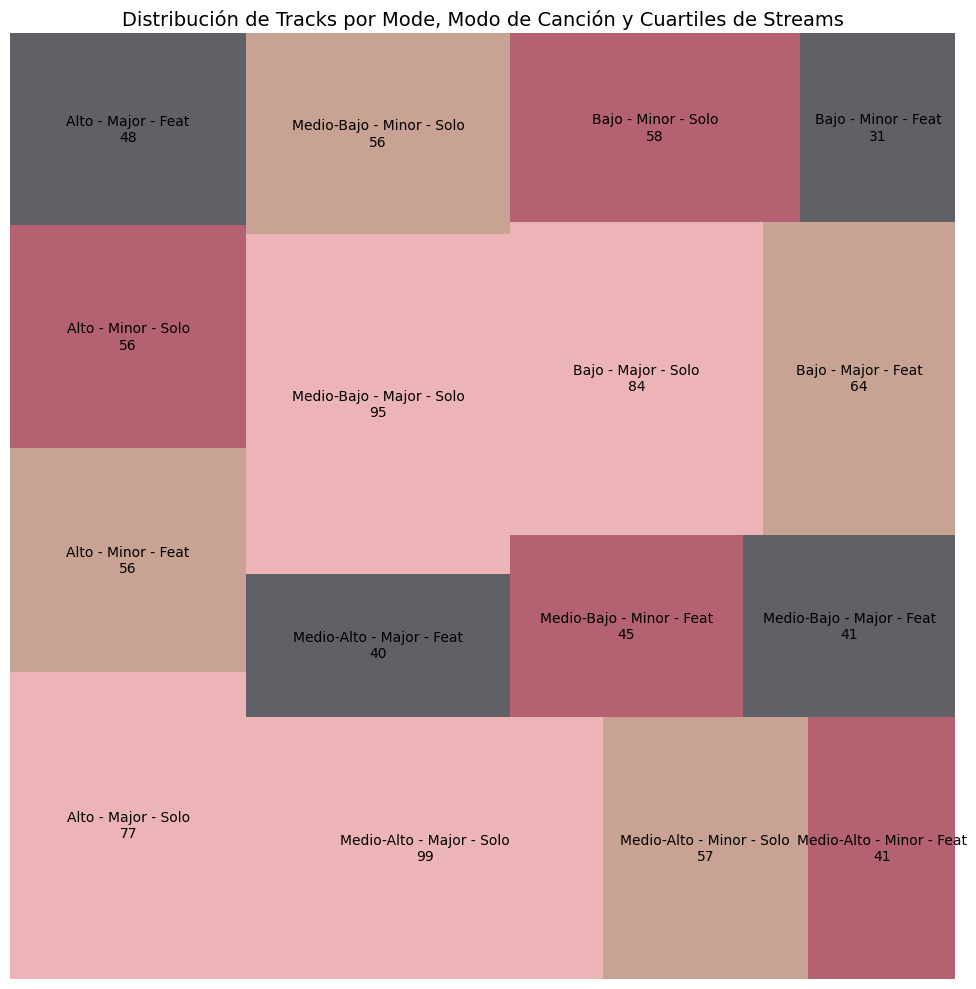

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# Definir los nombres de los cuartiles
cuartiles_dict = {4: 'Alto', 3: 'Medio-Alto', 2: 'Medio-Bajo', 1: 'Bajo'}
df_cleaned['cuartiles_categoria'] = df_cleaned['cuartiles_streams'].map(cuartiles_dict)

# Crear tabla pivot para el gráfico combinado de mode y modo_cancion
pivot_table_combinado = df_cleaned.pivot_table(index=['cuartiles_categoria', 'mode'], columns='modo_cancion', values='track_id', aggfunc='count', fill_value=0)

# Convertir la tabla pivot a formato adecuado para el gráfico
df_combinado = pivot_table_combinado.reset_index().melt(id_vars=['cuartiles_categoria', 'mode'], var_name='modo_cancion', value_name='count')

# Ordenar los datos de manera personalizada para un treemap horizontal
orden_personalizado = ['Alto', 'Medio-Alto', 'Medio-Bajo', 'Bajo']
df_combinado['cuartiles_categoria'] = pd.Categorical(df_combinado['cuartiles_categoria'], categories=orden_personalizado, ordered=True)
df_combinado.sort_values(by=['cuartiles_categoria', 'count'], ascending=[True, False], inplace=True)

# Convertir cuartiles_categoria a tipo str para concatenar
df_combinado['cuartiles_categoria'] = df_combinado['cuartiles_categoria'].astype(str)

# Definir una paleta de colores según las especificaciones
palette = ['#E9A1A5', '#BB8C79', '#A23B4D', '#373940']  # #E9A1A5, café rosado, palo rosa oscuro, café oscuro

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Crear el treemap combinado para mode y modo_cancion
squarify.plot(sizes=df_combinado['count'], label=df_combinado['cuartiles_categoria'] + ' - ' + df_combinado['mode'] + ' - ' + df_combinado['modo_cancion'] + '\n' + df_combinado['count'].astype(str), alpha=.8, color=palette, text_kwargs={'fontsize':10})
plt.title('Distribución de Tracks por Mode, Modo de Canción y Cuartiles de Streams', fontsize=14)
plt.axis('off')

# Ajustar el espaciado y mostrar la figura
plt.tight_layout()
plt.show()
